# 1º trabalho de AEDV
   
    Igor Patricio Michels
    Igor Cortes Junqueira

## Escolha da base de dados

O primeiro passo do trabalho foi a escolha da base de dados. Para tanto optamos por otimizar o tempo fazendo a escolha de uma base que pode nos porporcionar a escolha da próxima série a ser assistida. Dessa forma, escolhemos uma base do Kaggle com séries em diversas plataformas, a qual pode ser encontrada [aqui](https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney).

Um problema dessa base é que ela não é muito informativa, isto é, uma das informações que consideramos de maior relevância, o gênero da série, não está presente nessa base. Dessa forma, buscamos novas bases de dados no Kaggle, uma da [Netflix](https://www.kaggle.com/shivamb/netflix-shows), uma da [Amazon Prime](https://www.kaggle.com/nilimajauhari/amazon-prime-tv-shows) e uma da [Disney Plus](https://www.kaggle.com/unanimad/disney-plus-shows), as quais possuem a indicação do gênero.

Para utilizar as 4 bases descritas, realizamos um merge entre elas a partir do título, incluindo o gênero da série na nossa base. As demais informações presentes nas últimas 3 bases foram descartadas, uma vez que nem todas tinham aquela informação. Da base original descartamos todos os títulos que estavam presentes apenas na plataforma Hulu, uma vez que esta plataforma não está disponível no Brasil.

Abaixo temos a preparação do ambiente, com a importação das bibliotecas utilizadas, bem como a importação das bancos de dados.

## Importação e limpeza dos dados

In [1]:
library(readr)
library(stringr)
library(rlist)
library(dplyr)
library(ggplot2)

Warning message:
"package 'rlist' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Abaixo temos a leitura e uma breve descrição de cada base de dados utilizada.

In [2]:
shows <- read_csv("tv_shows.csv")
glimpse(shows)

Parsed with column specification:
cols(
  ID = col_character(),
  Title = col_character(),
  Year = col_double(),
  Age = col_character(),
  IMDb = col_double(),
  Rotten_Tomatoes = col_character(),
  Netflix = col_double(),
  Hulu = col_double(),
  Prime_Video = col_double(),
  DisneyPlus = col_double(),
  type = col_double()
)
Warning message:
"85 parsing failures.
row col   expected    actual           file
 63  -- 11 columns 1 columns 'tv_shows.csv'
 69  -- 11 columns 1 columns 'tv_shows.csv'
423  -- 11 columns 1 columns 'tv_shows.csv'
453  -- 11 columns 1 columns 'tv_shows.csv'
528  -- 11 columns 1 columns 'tv_shows.csv'
... ... .......... ......... ..............
See problems(...) for more details.
"

Rows: 5,611
Columns: 11
$ ID              <chr> "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"~
$ Title           <chr> "Breaking Bad", "Stranger Things", "Money Heist", "She~
$ Year            <dbl> 2008, 2016, 2017, 2010, 2015, 2005, 2011, 2005, 2013, ~
$ Age             <chr> "18+", "16+", "18+", "16+", "18+", "16+", "18+", "16+"~
$ IMDb            <dbl> 9.5, 8.8, 8.4, 9.1, 8.7, 8.9, 8.8, 8.4, 8.8, 9.2, 8.2,~
$ Rotten_Tomatoes <chr> "96%", "93%", "91%", "78%", "97%", "81%", "83%", "93%"~
$ Netflix         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ Hulu            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ~
$ Prime_Video     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ DisneyPlus      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ type            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~


In [3]:
disney <- read_csv("disney_plus_shows.csv")
glimpse(disney)

Parsed with column specification:
cols(
  imdb_id = col_character(),
  title = col_character(),
  plot = col_character(),
  type = col_character(),
  rated = col_character(),
  year = col_character(),
  released_at = col_character(),
  added_at = col_character(),
  runtime = col_character(),
  genre = col_character(),
  director = col_character(),
  writer = col_character(),
  actors = col_character(),
  language = col_character(),
  country = col_character(),
  awards = col_character(),
  metascore = col_character(),
  imdb_rating = col_character(),
  imdb_votes = col_character()
)


Rows: 992
Columns: 19
$ imdb_id     <chr> "tt0147800", "tt7019028", "tt0115433", "tt0324941", "tt021~
$ title       <chr> "10 Things I Hate About You", "101 Dalmatian Street", "101~
$ plot        <chr> "A pretty, popular teenager can't go out on a date until h~
$ type        <chr> "movie", "series", "movie", "movie", "movie", "movie", "mo~
$ rated       <chr> "PG-13", "N/A", "G", "G", "G", "PG", "G", "G", "N/A", "G",~
$ year        <chr> "1999", "2018–", "1996", "2002", "2000", "2011", "1954", "~
$ released_at <chr> "31 Mar 1999", "25 Mar 2019", "27 Nov 1996", "21 Jan 2003"~
$ added_at    <chr> "November 12, 2019", "February 28, 2020", "November 12, 20~
$ runtime     <chr> "97 min", "N/A", "103 min", "74 min", "100 min", "90 min",~
$ genre       <chr> "Comedy, Drama, Romance", "Animation, Comedy, Family", "Ad~
$ director    <chr> "Gil Junger", "N/A", "Stephen Herek", "Jim Kammerud, Brian~
$ writer      <chr> "Karen McCullah, Kirsten Smith", "N/A", "Dodie Smith (nove~
$ actors      <chr

In [4]:
netflix <- read_csv("netflix_titles.csv")
glimpse(netflix)

Parsed with column specification:
cols(
  show_id = col_character(),
  type = col_character(),
  title = col_character(),
  director = col_character(),
  cast = col_character(),
  country = col_character(),
  date_added = col_character(),
  release_year = col_double(),
  rating = col_character(),
  duration = col_character(),
  listed_in = col_character(),
  description = col_character()
)


Rows: 7,787
Columns: 12
$ show_id      <chr> "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s1~
$ type         <chr> "TV Show", "Movie", "Movie", "Movie", "Movie", "TV Show",~
$ title        <chr> "3%", "7:19", "23:59", "9", "21", "46", "122", "187", "70~
$ director     <chr> NA, "Jorge Michel Grau", "Gilbert Chan", "Shane Acker", "~
$ cast         <chr> "João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Val~
$ country      <chr> "Brazil", "Mexico", "Singapore", "United States", "United~
$ date_added   <chr> "August 14, 2020", "December 23, 2016", "December 20, 201~
$ release_year <dbl> 2020, 2016, 2011, 2009, 2008, 2016, 2019, 1997, 2019, 200~
$ rating       <chr> "TV-MA", "TV-MA", "R", "PG-13", "PG-13", "TV-MA", "TV-MA"~
$ duration     <chr> "4 Seasons", "93 min", "78 min", "80 min", "123 min", "1 ~
$ listed_in    <chr> "International TV Shows, TV Dramas, TV Sci-Fi & Fantasy",~
$ description  <chr> "In a future where the elite inhabit an island paradise f~


In [5]:
prime <- read_csv("Prime TV Shows Data set.csv")
glimpse(prime)

Parsed with column specification:
cols(
  ID = col_double(),
  Title = col_character(),
  Release_Year = col_double(),
  Seasons_Avaliable = col_double(),
  Language = col_character(),
  Genre = col_character(),
  IMDb = col_double(),
  Age = col_character()
)


Rows: 404
Columns: 8
$ ID                <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1~
$ Title             <chr> "Pataal Lok", "Upload", "The Marvelous Mrs. Maisel",~
$ Release_Year      <dbl> 2020, 2020, 2017, 2019, 2016, 2019, 2018, 2018, 2019~
$ Seasons_Avaliable <dbl> 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1~
$ Language          <chr> "Hindi", "English", "English", "Hindi", "English", "~
$ Genre             <chr> "Drama", "Sci-fi comedy", "Drama, Comedy", "Drama, C~
$ IMDb              <dbl> 7.5, 8.1, 8.7, 5.3, 8.7, 8.3, 7.5, 8.5, 8.6, 8.0, NA~
$ Age               <chr> "18+", "16+", "16+", "18+", "18+", "18+", "16+", "18~


Feito isso, iremos compor a base do trabalho, isto é, fazer o merge dos bancos utilizados, bem como a exclusão das séries exclusivas da Hulu.

In [6]:
# Limpando o databse conjunto para os dados relevantes

cshows <- shows %>% mutate(Streamings = paste(sep = " ", ifelse(Netflix == 1, "Netflix", ""),
                                                         ifelse(Prime_Video == 1, "Prime", ""),
                                                         ifelse(DisneyPlus == 1, "Disney", "")) %>%
                                        trimws() %>%
                                        str_replace(" ",", ")) %>%
                                        select(-Netflix, -Hulu, -Prime_Video, -DisneyPlus, -type, -ID)

cshows <- subset(cshows, Streamings != "NA, NA NA" & Streamings != "")
cshows <- cshows %>% mutate(Rotten_Tomatoes = as.numeric(sub("%", "", Rotten_Tomatoes)))

# Importanto Genero dos demais databases

t1 <- netflix %>% mutate(Title = title, Genre = listed_in) %>% select(Title, Genre) 
t2 <- prime %>% mutate(Title = ) %>% select(Title, Genre)
t3 <- disney %>% mutate(Title = title, Genre = genre) %>% select(Title, Genre)
gb <- c("Title", "Genre")
t <- full_join(t1, full_join(t2, t3, by = gb), by = gb)

cshows <- left_join(cshows, t, by = 'Title')
glimpse(cshows)

Rows: 4,143
Columns: 7
$ Title           <chr> "Breaking Bad", "Stranger Things", "Money Heist", "She~
$ Year            <dbl> 2008, 2016, 2017, 2010, 2015, 2005, 2011, 2005, 2005, ~
$ Age             <chr> "18+", "16+", "18+", "16+", "18+", "16+", "18+", "16+"~
$ IMDb            <dbl> 9.5, 8.8, 8.4, 9.1, 8.7, 8.9, 8.8, 8.4, 8.4, 8.8, 9.2,~
$ Rotten_Tomatoes <dbl> 96, 93, 91, 78, 97, 81, 83, 93, 93, 92, 100, 81, 94, 8~
$ Streamings      <chr> "Netflix", "Netflix", "Netflix", "Netflix", "Netflix",~
$ Genre           <chr> "Crime TV Shows, TV Dramas, TV Thrillers", "TV Horror,~


Como utilizamos 3 bases distintas para incluir o gênero da série, é natural que o gênero esteja totalmente despadronizado, dessa forma estamos criando uma lista de gêneros para facilitar nossas queries.

In [7]:
x <- ""
for(g in cshows[,'Genre'][[1]]){
    c <- str_replace_all(g,"TV","") %>%
         str_replace_all("Reality-", "Reality-Show") %>%
         str_replace_all("Sci-Fi", "Sci-fi") %>%
         str_replace_all("Sci-fi comedy", "") %>%
         str_replace_all(" &", ",") %>%
         str_replace_all("Movies", "") %>%
         str_replace_all("Shows", "") %>%
         str_replace_all("/", "") %>%
         str_replace_all("Mysteries", "Mystery") %>%
         str_replace_all("Comedies", "Comedy") %>%
         str_replace_all("Documentaries", "Documentary") %>%
         str_replace_all("Dramas", "Drama") %>%
         str_replace_all("Musicals", "Musical") %>%
         str_replace_all("Thrillers", "Thriller") %>%
         str_replace_all("Talk-Show", "") %>%
         str_replace_all("Romantic", "Romance") %>%
         str_replace_all("Anime Series", "Anime") %>%
         str_replace_all("Kids\'", "") %>%
         str_replace_all("Kids\'", "")

    x <- paste(x, trimws(c), sep = ",")
}

gens <- strsplit(x, ",")[[1]] %>%
        trimws() %>%
        unique()

gens <- gens[gens != ""]
gens

[1] "Crime"            "Drama"            "Thriller"         "Horror"          
 [5] "Mystery"          "Sci-fi"           "Fantasy"          "NA"              
 [9] "British"          "International"    "Comedy"           "Classic"         
[13] "Cult"             "Action"           "Adventure"        "Suspense"        
[17] "Anime"            "Romance"          "Spanish-Language" "Teen"            
[21] "Docuseries"       "Science"          "Nature"           "Reality"         
[25] "Documentary"      "Sports"           "Korean"           "Animation"       
[29] "Family"           "Musical"          "Independent"      "Stand-Up Comedy" 
[33] "Talk"             "Reality-Show"     "Game-Show"        "Kids"            
[37] "Children"         "Short"            "Music"            "Western"         
[41] "LGBTQ"            "Arts"             "Entertainment"    "Culture"

## Análise Exploratória

In [8]:
varpop <- function(x){
  n <- length(x)
  var(x)*(n-1)/n
}

In [9]:
plataforma <- table(cshows$Streamings)
plataforma


          Disney          Netflix Netflix,  Disney   Netflix, Prime 
             186             1832                8               93 
           Prime 
            2024 

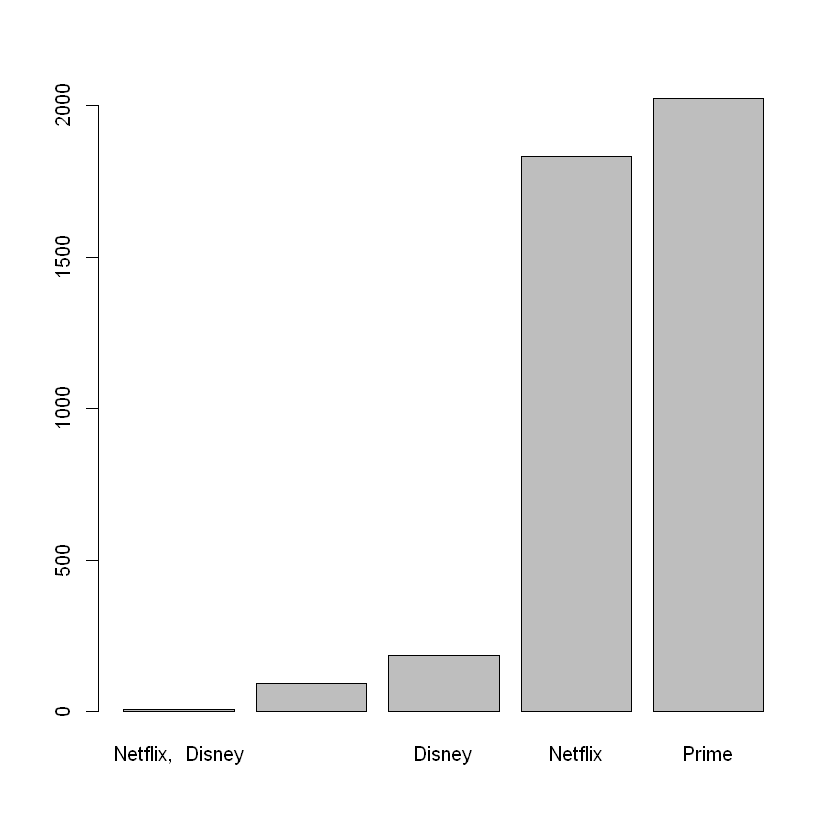

In [10]:
barplot(sort(plataforma))

In [11]:
plataforma <- prop.table(plataforma)
plataforma


          Disney          Netflix Netflix,  Disney   Netflix, Prime 
     0.044895004      0.442191649      0.001930968      0.022447502 
           Prime 
     0.488534878 

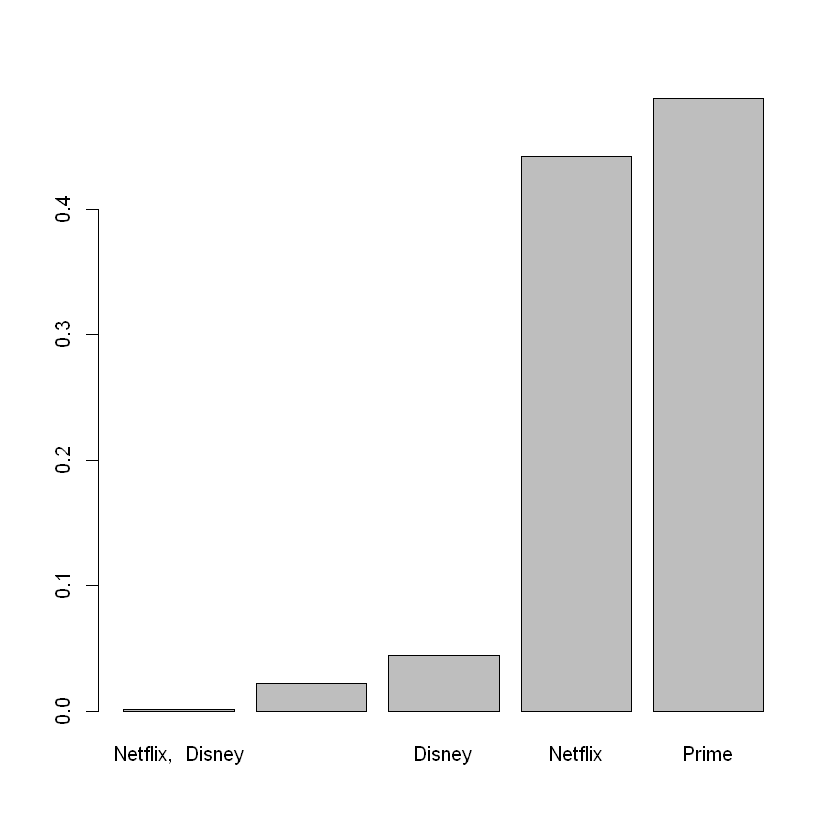

In [12]:
barplot(sort(plataforma))

Note que mais que 50% das séries disponíveis se encontram no Amazon Prime (48.85% da Amazon Prime e 2.24% que estão na Netflix e na Amazon Prime). Outro fato interessante é que o Disney Plus tem menos que 5% das séries e, além disso, nenhuma série se encontra no Disney Plus e na Amazon Prime simultaneamente.

Um outro dado de nosso interesse é a avaliação da crítica, dessa forma, analisando as notas, quanto ao IMDb, temos.

In [13]:
quantile(cshows[, "IMDb"], na.rm = TRUE)

0%  25%  50%  75% 100% 
 1.0  6.6  7.4  8.0  9.5

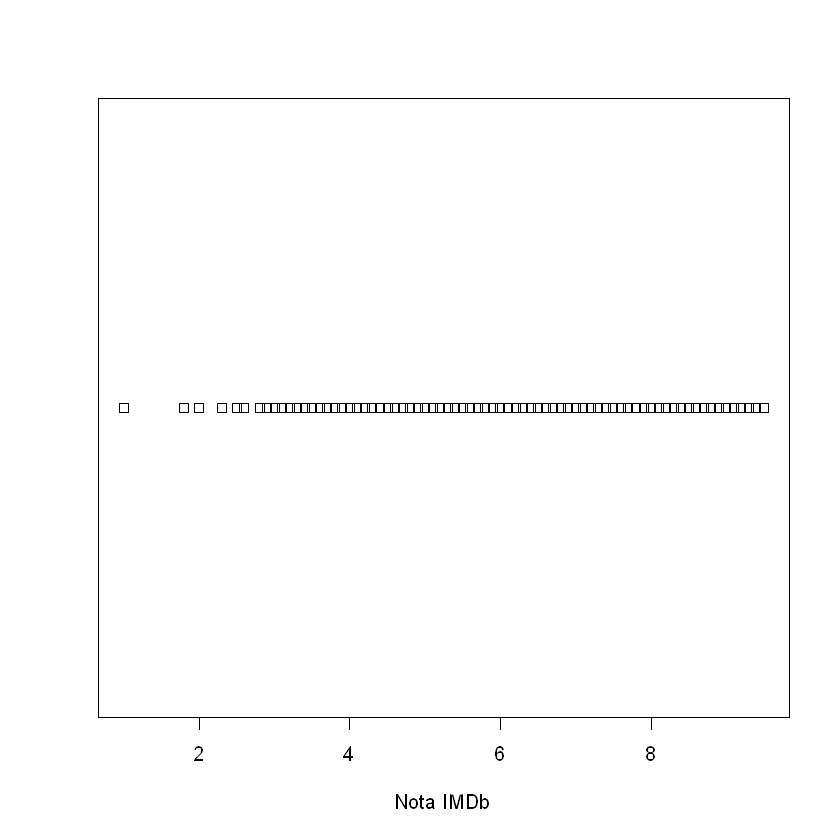

In [14]:
stripchart(cshows[, "IMDb"], xlab = "Nota IMDb")

Warning message:
"Removed 938 rows containing non-finite values (stat_boxplot)."

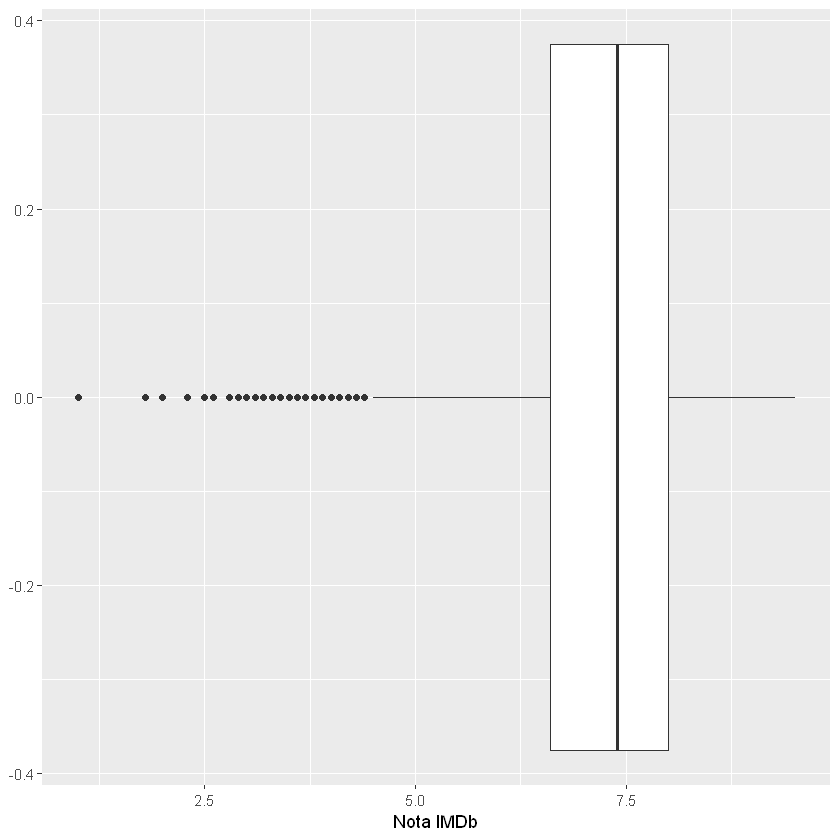

In [15]:
cshows %>% 
ggplot(aes(x = IMDb)) +
geom_boxplot() +
labs(x = "Nota IMDb")

Já de acordo com o Rotten Tomatoes

In [16]:
quantile(cshows[, "Rotten_Tomatoes"], na.rm = TRUE)

0%  25%  50%  75% 100% 
   6   67   84   93  100

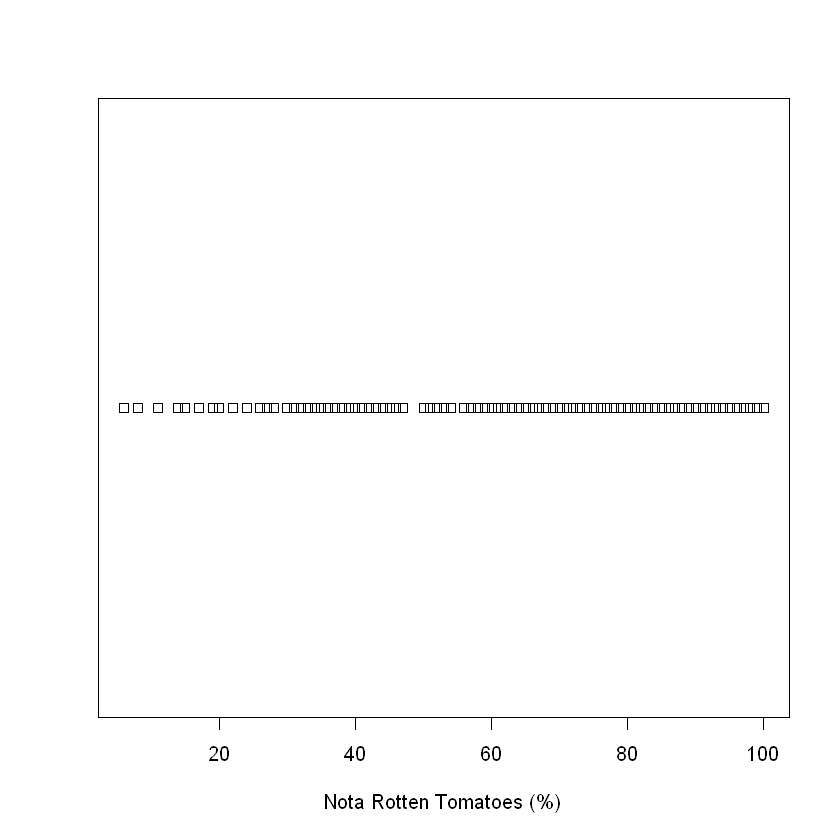

In [17]:
stripchart(cshows[, "Rotten_Tomatoes"], xlab = "Nota Rotten Tomatoes (%)")

Warning message:
"Removed 3435 rows containing non-finite values (stat_boxplot)."

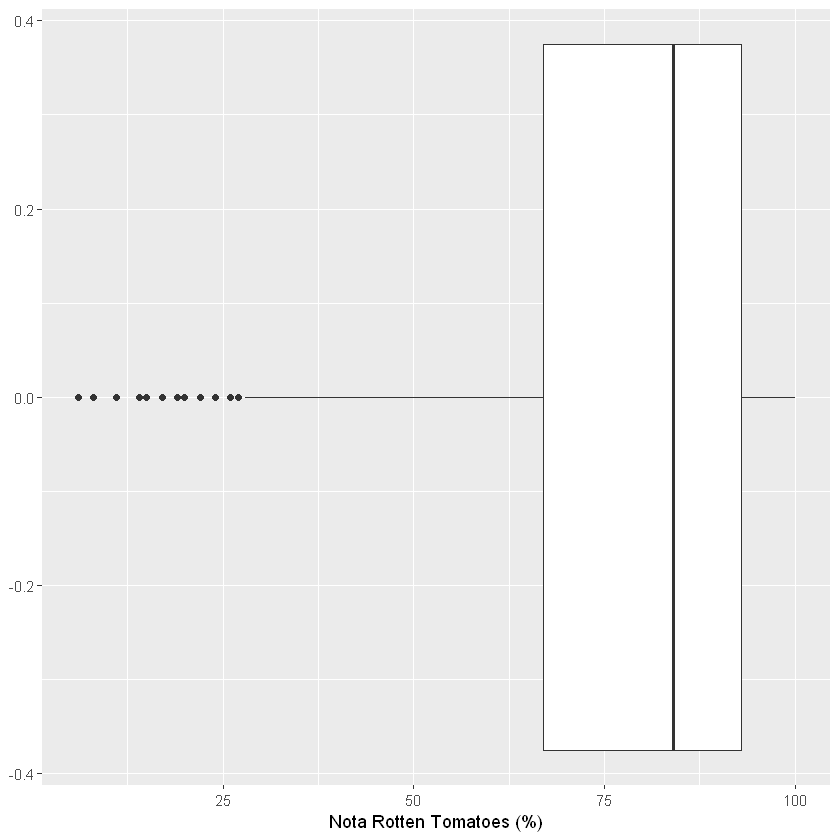

In [18]:
cshows %>% 
ggplot(aes(x = Rotten_Tomatoes)) +
geom_boxplot() +
labs(x = "Nota Rotten Tomatoes (%)")

Também é possível fazer algumas análises quanto as notas de acordo com a série, dando ênfase na plataforma de origem. Nos gráficos abaixo estão as melhores séries de 2020, por exemplo.

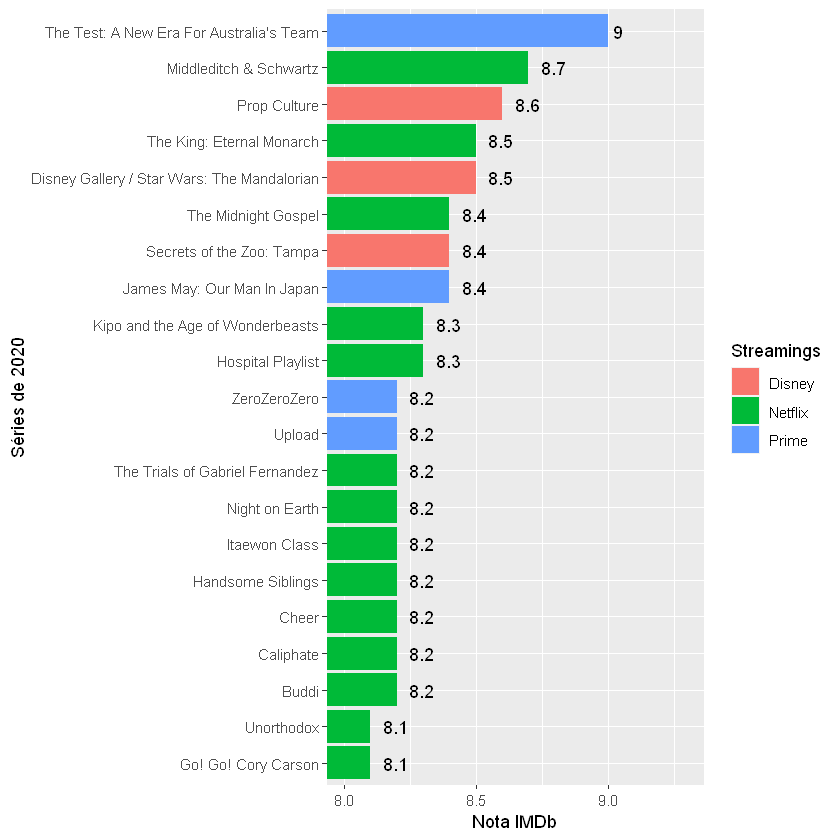

In [19]:
# Melhores séries de 2020 pelo IMDb (nota > 8)
cshows %>% filter(Year==2020, IMDb>8) %>% arrange(-IMDb) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(8,9.3)) + xlab("Séries de 2020") + ylab("Nota IMDb") +
    geom_text(aes(label = IMDb), hjust = -.5)

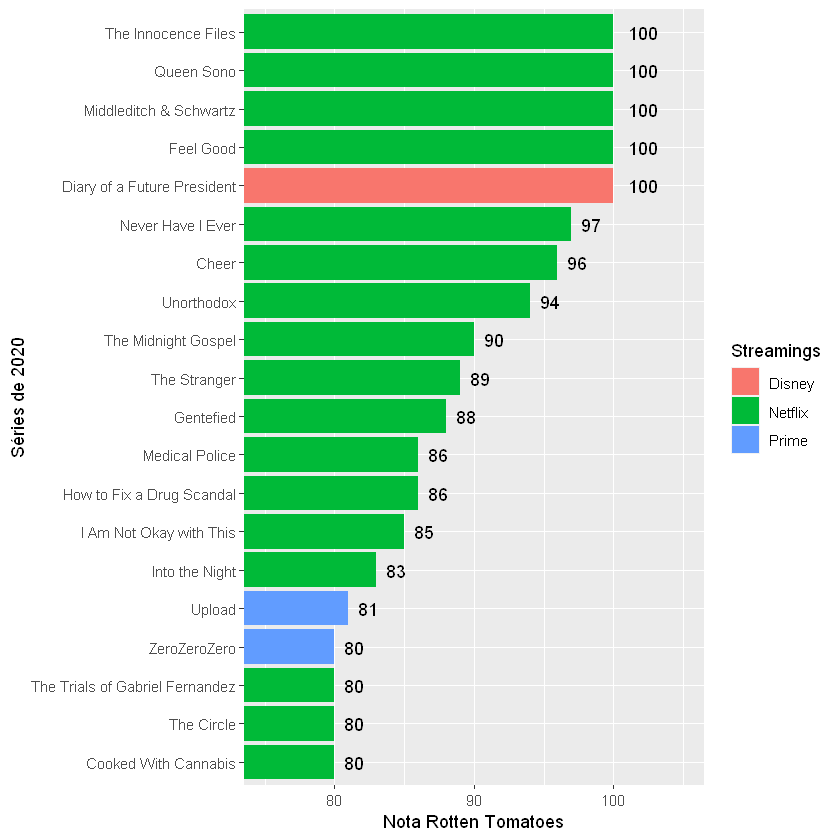

In [20]:
# Melhores séries de 2020 pelo Rotten Tomatoes (nota > 80)
cshows %>% filter(Year==2020, Rotten_Tomatoes>=80) %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(75,105)) + xlab("Séries de 2020") + ylab("Nota Rotten Tomatoes") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

Outra análise interessante se dá pela faixa etária da série. Dessa forma, é possível também analisar a quantidade de títulos por faixa etária e plataforma

In [21]:
plataforma <- table(cshows$Streamings, cshows$Age)
plataforma

                  
                   13+ 16+ 18+  7+ all
  Disney             0   3   0  71  82
  Netflix            3 394 355 271 151
  Netflix,  Disney   0   0   0   4   4
  Netflix, Prime     0  17   4  26  17
  Prime              1 196 177 196 174

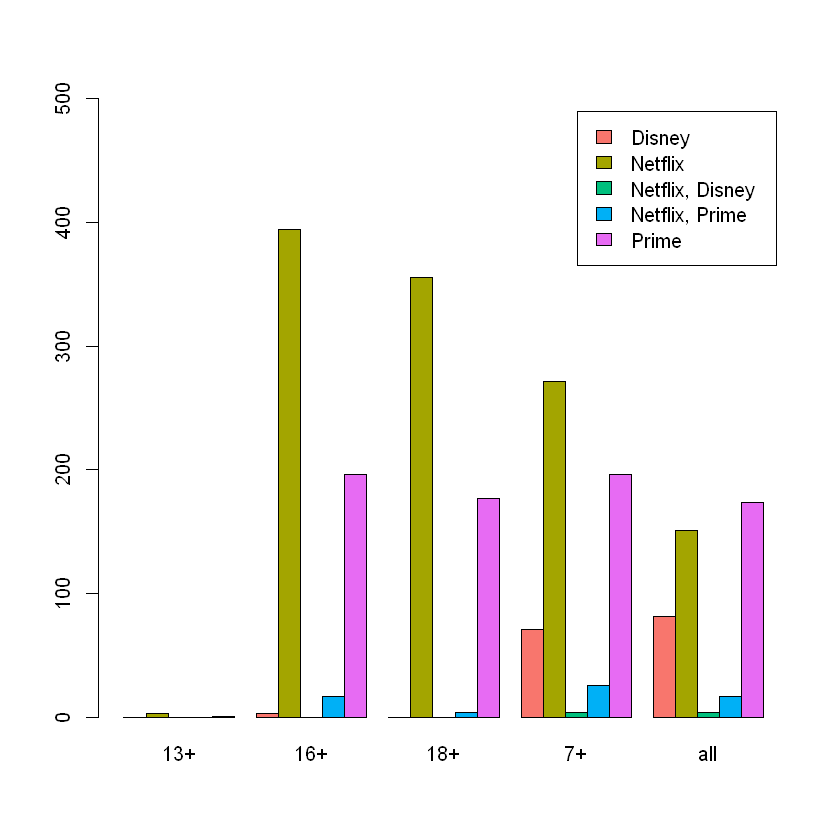

In [22]:
barplot(plataforma,
        beside = TRUE,
        legend.text = c("Disney", "Netflix", "Netflix, Disney", "Netflix, Prime", "Prime"),
        col = c("#f8766d", "#a3a500", "#00bf7d", "#00b0f6", "#e76bf3"),
        ylim = c(0, 500))

Uma outra visualização dos mesmos dados, mas com a inclusão de uma série temporal, se dá conforme abaixo

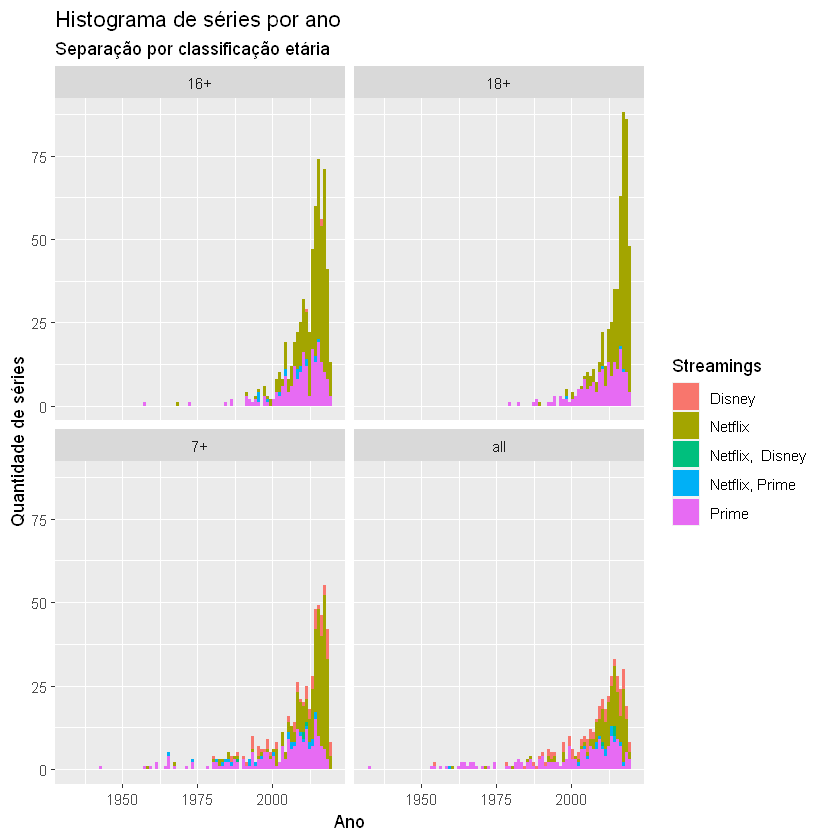

In [23]:
# Séries por ano, por faixa etária. Tirei idades 13+ (poucas séries) NA (não informativo)
cshows %>% 
filter(Age != "13+", Age != "NA") %>% 
    ggplot(aes(x = Year, fill = Streamings)) +
    geom_histogram(binwidth = 1, boundary = 0) +
    facet_wrap(~ Age, ncol = 2)+ 
    labs(x = "Ano",
    y = "Quantidade de séries",
    title = "Histograma de séries por ano",
    subtitle = "Separação por classificação etária")

Agora, uma pergunta natural é: "As séries de uma plataforma são melhores que de outra?", bem como a pergunta "Há alguma correlação entre a plataforma de uma série e sua nota?".

Podemos ver a correlação entre plataforma e nota abaixo. Primeiramente pelo IMDb.

In [24]:
notas_disney <- cshows %>% filter(Streamings == "Disney", !is.na(IMDb))
var_disney <- varpop(notas_disney$IMDb)
n_disney <- length(notas_disney$IMDb)

notas_netflix <- cshows %>% filter(Streamings == "Netflix", !is.na(IMDb))
var_netflix <- varpop(notas_netflix$IMDb)
n_netflix <- length(notas_netflix$IMDb)

notas_prime <- cshows %>% filter(Streamings == "Prime", !is.na(IMDb))
var_prime <- varpop(notas_prime$IMDb)
n_prime <- length(notas_prime$IMDb)

notas_netflix_disney <- cshows %>% filter(Streamings == "Netflix,  Disney", !is.na(IMDb))
var_netflix_disney <- varpop(notas_netflix_disney$IMDb)
n_netflix_disney <- length(notas_netflix_disney$IMDb)

notas_netflix_prime <- cshows %>% filter(Streamings == "Netflix, Prime", !is.na(IMDb))
var_netflix_prime <- varpop(notas_netflix_prime$IMDb)
n_netflix_prime <- length(notas_netflix_prime$IMDb)

notas <- cshows %>% filter(!is.na(IMDb))
var <- varpop(notas$IMDb)
n_IMDb <- n_disney + n_netflix + n_prime + n_netflix_disney + n_netflix_prime

var_barra <- (n_disney * var_disney + n_netflix * var_netflix + n_prime * var_prime + n_netflix_disney * var_netflix_disney + n_netflix_prime * var_netflix_prime)/n_IMDb
r2 <- 1 - var_barra/var
r2

[1] 0.002629741

In [25]:
X_squared <- chisq.test(cshows$Streamings, cshows$IMDb)
X_squared[1]

Warning message in chisq.test(cshows$Streamings, cshows$IMDb):
"Chi-squared approximation may be incorrect"

$statistic
X-squared 
 331.1682

In [26]:
C = sqrt(unname(X_squared[["statistic"]])/(length(cshows$Streamings) + unname(X_squared[["statistic"]])))
C

[1] 0.2720622

De onde percebe-se que aproximadamente 27% da nota do IMDb pode ser explicada através da Streaming.

Podemos ver o mesmo de acordo com o Rotten Tomatoes.

In [27]:
notas_disney <- cshows %>% filter(Streamings == "Disney", !is.na(Rotten_Tomatoes))
var_disney <- varpop(notas_disney$Rotten_Tomatoes)
n_disney <- length(notas_disney$Rotten_Tomatoes)

notas_netflix <- cshows %>% filter(Streamings == "Netflix", !is.na(Rotten_Tomatoes))
var_netflix <- varpop(notas_netflix$Rotten_Tomatoes)
n_netflix <- length(notas_netflix$Rotten_Tomatoes)

notas_prime <- cshows %>% filter(Streamings == "Prime", !is.na(Rotten_Tomatoes))
var_prime <- varpop(notas_prime$Rotten_Tomatoes)
n_prime <- length(notas_prime$Rotten_Tomatoes)

notas_netflix_prime <- cshows %>% filter(Streamings == "Netflix, Prime", !is.na(Rotten_Tomatoes))
var_netflix_prime <- varpop(notas_netflix_prime$Rotten_Tomatoes)
n_netflix_prime <- length(notas_netflix_prime$Rotten_Tomatoes)

notas <- cshows %>% filter(!is.na(Rotten_Tomatoes))
var <- varpop(notas$Rotten_Tomatoes)
n_Rotten <- n_disney + n_netflix + n_prime + n_netflix_disney + n_netflix_prime

var_barra <- (n_disney * var_disney + n_netflix * var_netflix + n_prime * var_prime + n_netflix_prime * var_netflix_prime)/n_Rotten
r2 <- 1 - var_barra/var
r2

[1] 0.01380825

In [28]:
X_squared <- chisq.test(cshows$Streamings, cshows$Rotten_Tomatoes)
X_squared[1]

Warning message in chisq.test(cshows$Streamings, cshows$Rotten_Tomatoes):
"Chi-squared approximation may be incorrect"

$statistic
X-squared 
 241.0393

In [29]:
C = sqrt(unname(X_squared[["statistic"]])/(length(cshows$Streamings) + unname(X_squared[["statistic"]])))
C

[1] 0.2344805

De onde percebe-se que aproximadamente 23% da nota do Rotten Tomatoes pode ser explicada através da Streaming. Aqui vale ressaltar que a quantidade de séries observadas é bem menor, conforme pode-se observar abaixo

In [30]:
print(n_IMDb) # Nota IMDb
print(n_Rotten) # Nota Rotten Tomatoes

[1] 3205
[1] 716


Com essas porcentagens na explicação, podemos ver que a plataforma de Streaming não é de suma importância para o sucesso de uma série, embora tenha boa relevância.

Agora, vamos a análise das notas das séries de cada plataforma. Um detalhe interessante para isso é analisar a distribuição das notas por plataforma, assim

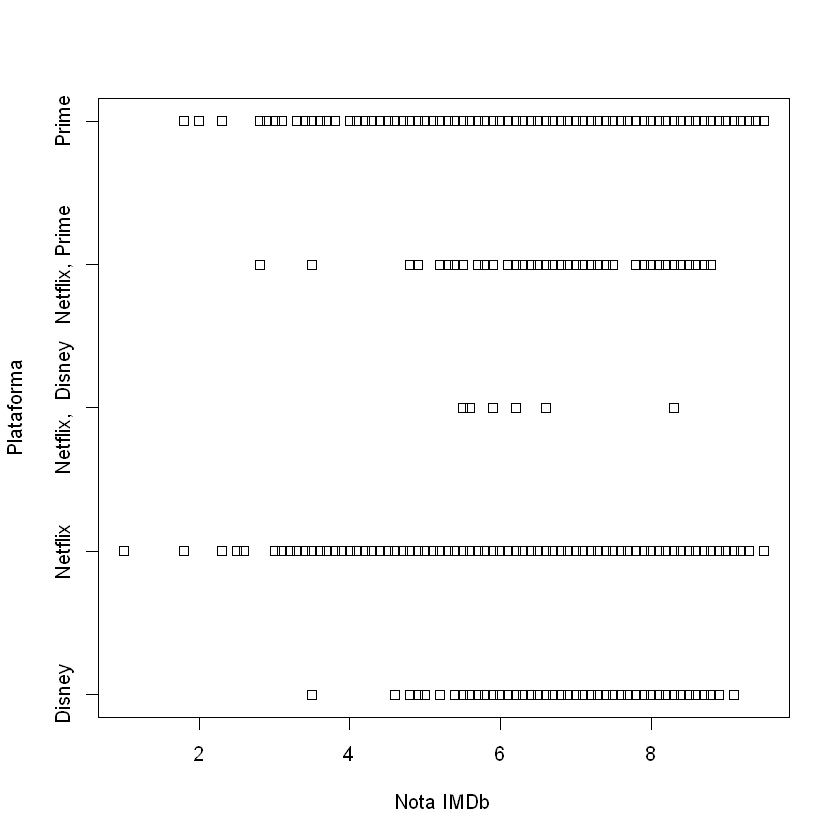

In [31]:
stripchart(cshows$IMDb ~ cshows$Streamings, xlab = "Nota IMDb", ylab = "Plataforma")

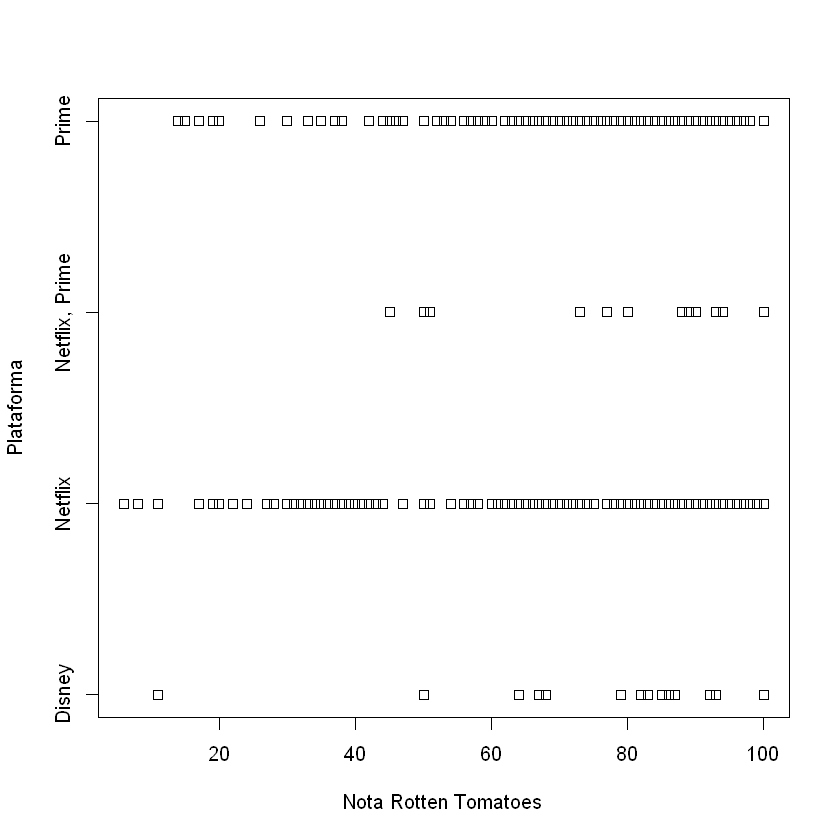

In [32]:
stripchart(cshows$Rotten_Tomatoes ~ cshows$Streamings, xlab = "Nota Rotten Tomatoes", ylab = "Plataforma")

Em virtude da quantidade de séries em plataformas como Netflix e Amazon Prime, onde temos várias séries, muitas partilhando a mesma nota, uma melhor noção de como elas se comportam se dá pelo boxplot dos dados

Warning message:
"Removed 938 rows containing non-finite values (stat_boxplot)."

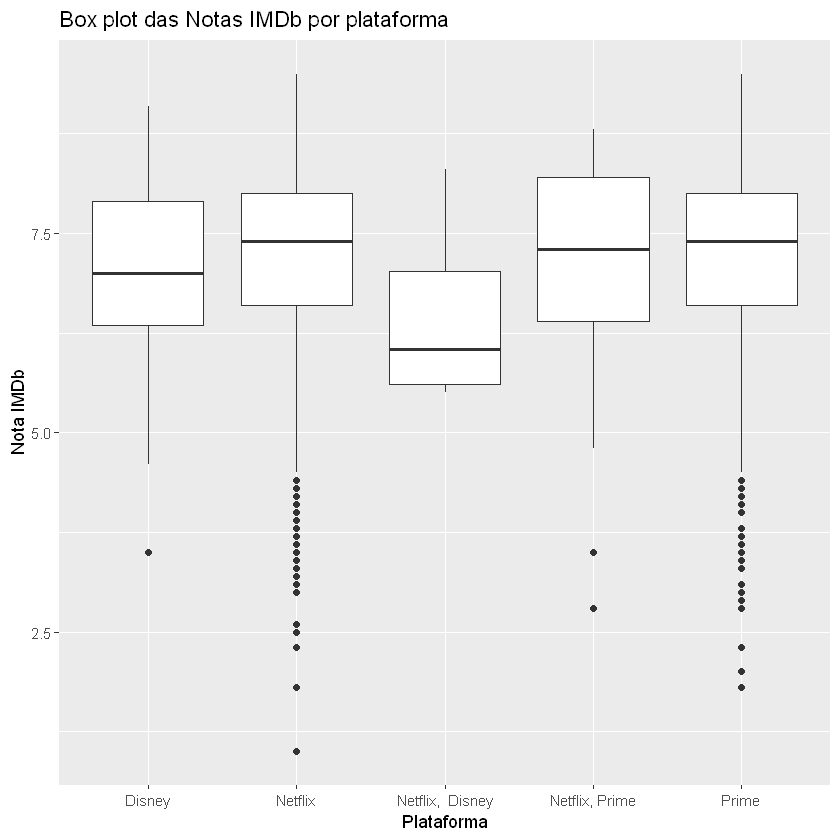

In [33]:
cshows %>% 
ggplot(aes(x = Streamings, y = IMDb)) +
geom_boxplot() +
labs(x = "Plataforma",
y = "Nota IMDb",
title = "Box plot das Notas IMDb por plataforma")

Warning message:
"Removed 3427 rows containing non-finite values (stat_boxplot)."

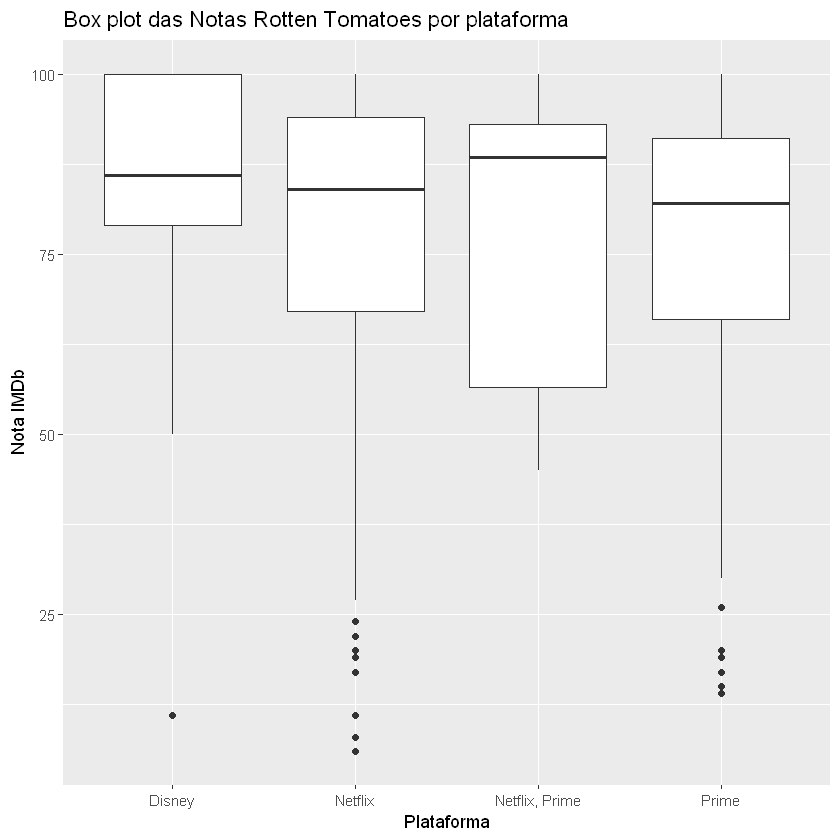

In [34]:
cshows %>% filter(Streamings != "Netflix,  Disney") %>% 
ggplot(aes(x = Streamings, y = Rotten_Tomatoes)) +
geom_boxplot() +
labs(x = "Plataforma",
y = "Nota IMDb",
title = "Box plot das Notas Rotten Tomatoes por plataforma")

Podemos também ver como as notas das séries se comportam ao comparar as duas notas obtidas.

Warning message:
"Removed 3430 rows containing missing values (geom_point)."

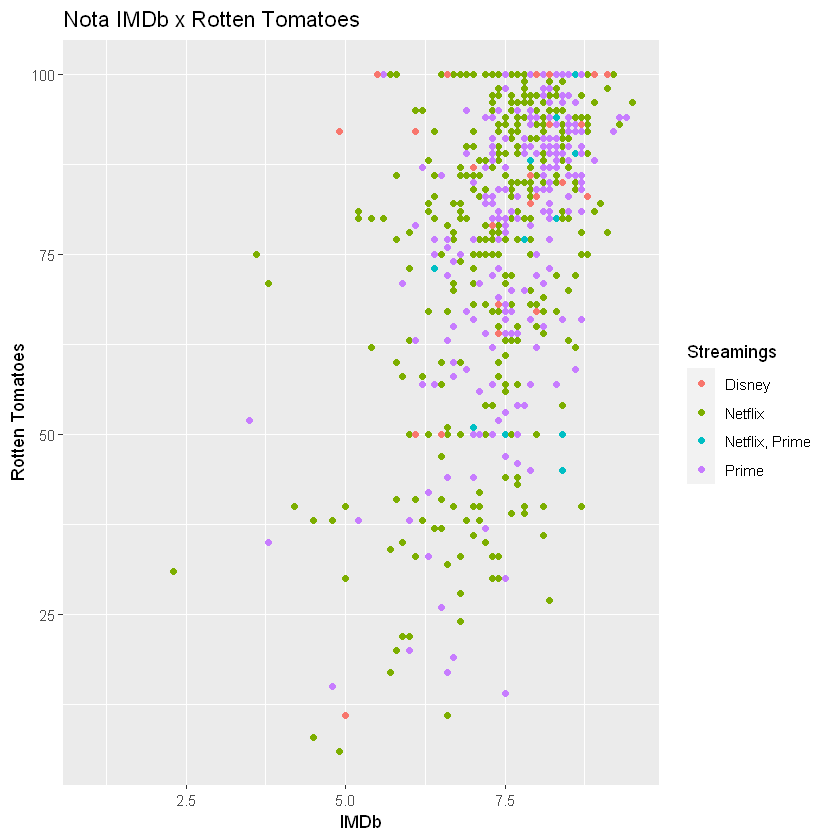

In [35]:
cshows %>% filter(Streamings != "Netflix,  Disney") %>% 
ggplot(aes(x = IMDb, y = Rotten_Tomatoes, color = Streamings)) +
labs(x = "IMDb", y = "Rotten Tomatoes", title = "Nota IMDb x Rotten Tomatoes") + 
geom_point()

Note que a análise da quantidade de séries com cada nota fica complicada nesse gráfico, dessa forma, podemos dividir as plataformas em subgráficos:

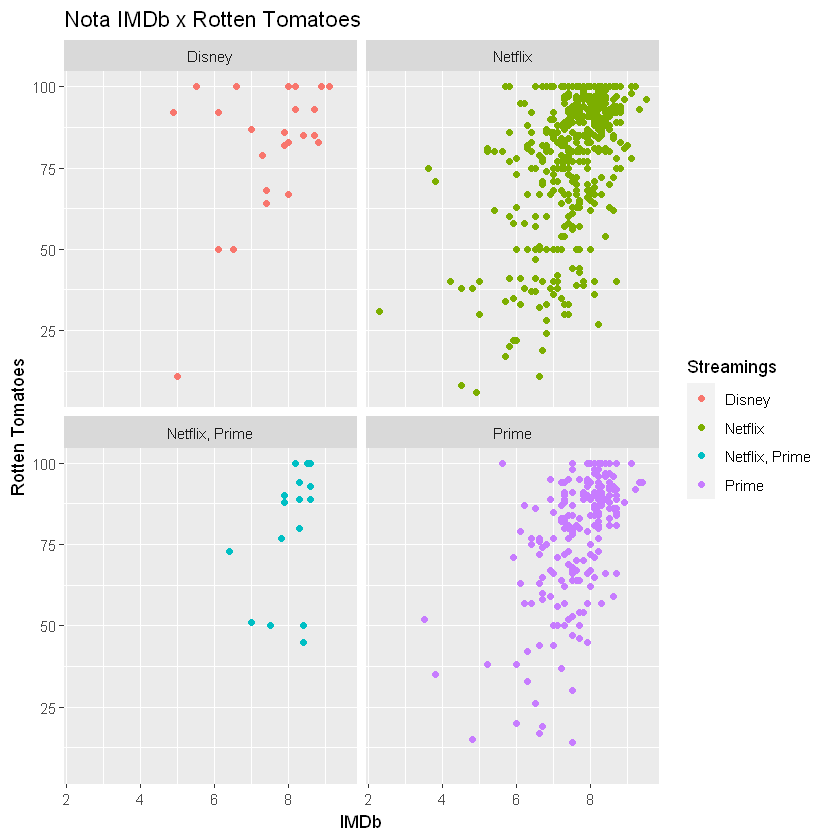

In [36]:
cshows %>% filter(Streamings != "Netflix,  Disney", !is.na(IMDb), !is.na(Rotten_Tomatoes)) %>% 
ggplot(aes(x = IMDb, y = Rotten_Tomatoes, color = Streamings)) +
labs(x = "IMDb", y = "Rotten Tomatoes", title = "Nota IMDb x Rotten Tomatoes") + 
geom_point() +
facet_wrap(~ Streamings, ncol = 2)

In [37]:
glimpse(cshows)

Rows: 4,143
Columns: 7
$ Title           <chr> "Breaking Bad", "Stranger Things", "Money Heist", "She~
$ Year            <dbl> 2008, 2016, 2017, 2010, 2015, 2005, 2011, 2005, 2005, ~
$ Age             <chr> "18+", "16+", "18+", "16+", "18+", "16+", "18+", "16+"~
$ IMDb            <dbl> 9.5, 8.8, 8.4, 9.1, 8.7, 8.9, 8.8, 8.4, 8.4, 8.8, 9.2,~
$ Rotten_Tomatoes <dbl> 96, 93, 91, 78, 97, 81, 83, 93, 93, 92, 100, 81, 94, 8~
$ Streamings      <chr> "Netflix", "Netflix", "Netflix", "Netflix", "Netflix",~
$ Genre           <chr> "Crime TV Shows, TV Dramas, TV Thrillers", "TV Horror,~


Por meio do Gráfico de Simetria entre IMDb e Rotten Tomatoes podemos comparar as críticas das séries.

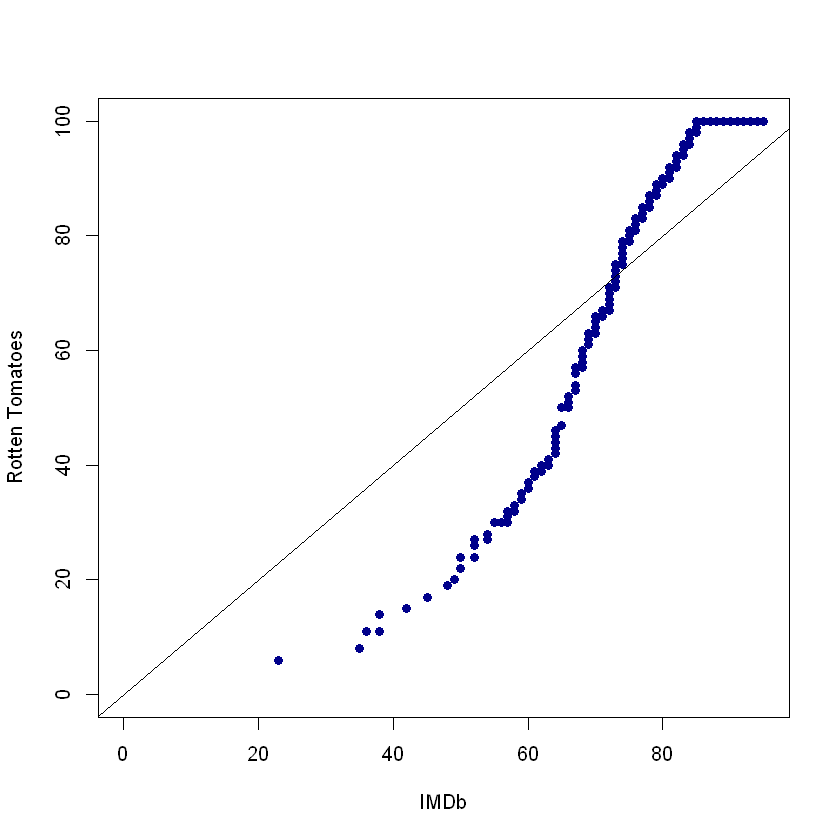

In [38]:
notas <- cshows %>% filter(!is.na(IMDb), !is.na(Rotten_Tomatoes)) %>% mutate(IMDb = 10*IMDb)

# x <- median(notas$IMDb) - notas$IMDb
# y <- notas$Rotten_Tomatoes - median(notas$Rotten_Tomatoes)

x <- notas$IMDb
y <- notas$Rotten_Tomatoes
plot(sort(x), sort(y), pch = 19, xlab = "IMDb", ylab = "Rotten Tomatoes", col = "darkblue", 
     xlim = c(0, max(x)), ylim = c(0, max(y)))
abline(0, 1)

Perceba que, na maioria das séries, as críticas divergem de opinião. Note também que o IMDb não credita muitos valores extremos, isto é, não temos nenhuma nota abaixo de 20 e poucas acima de 90, enquanto o Rotten Tomatoes essas quantidades são maiores.

Warning message:
"Removed 938 rows containing non-finite values (stat_qq)."

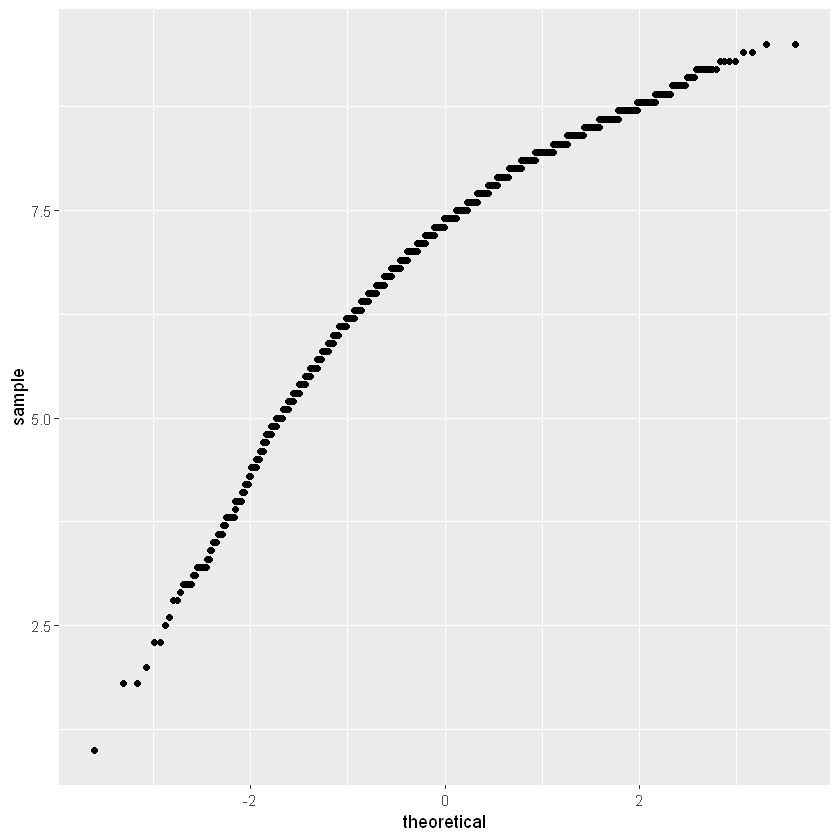

In [39]:
## qq plot
cshows %>% ggplot(aes(sample=IMDb))+stat_qq()

Warning message:
"Removed 3435 rows containing non-finite values (stat_qq)."

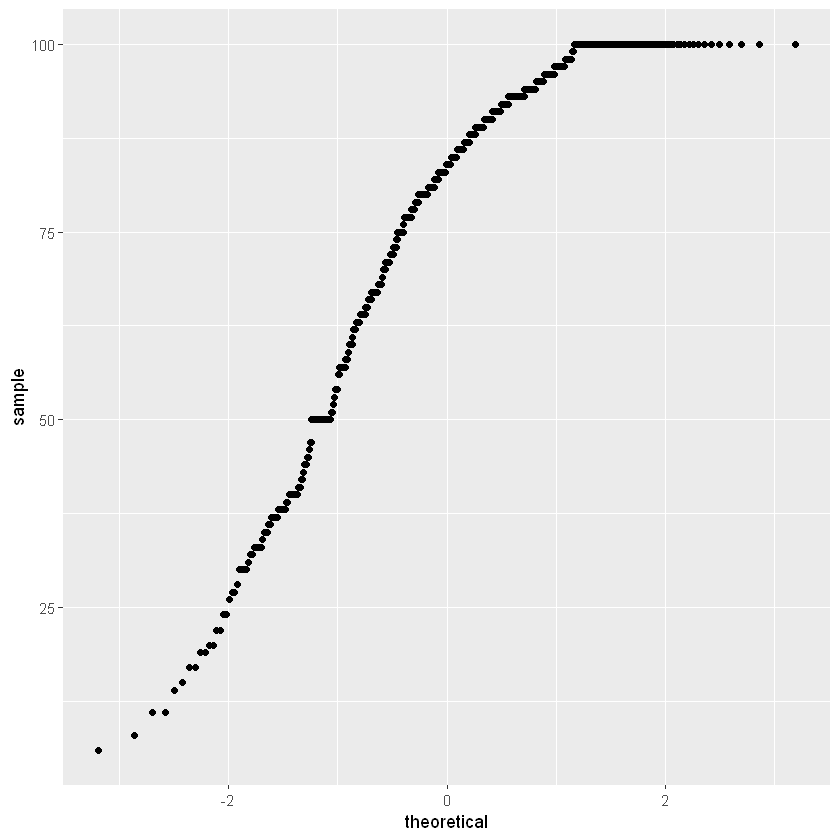

In [40]:
## qq plot
cshows %>% ggplot(aes(sample=Rotten_Tomatoes))+stat_qq()

### Curiosidades

Explorando mais algumas informações úteis para atualizar nossa <em>watchlist</em> e sanar nossa curiosidade:

In [41]:
idades <- cshows %>% group_by(Age) %>% tally(name="Qtd")
idades

Age,Qtd
13+,4
16+,610
18+,536
7+,568
all,428
NA,1997


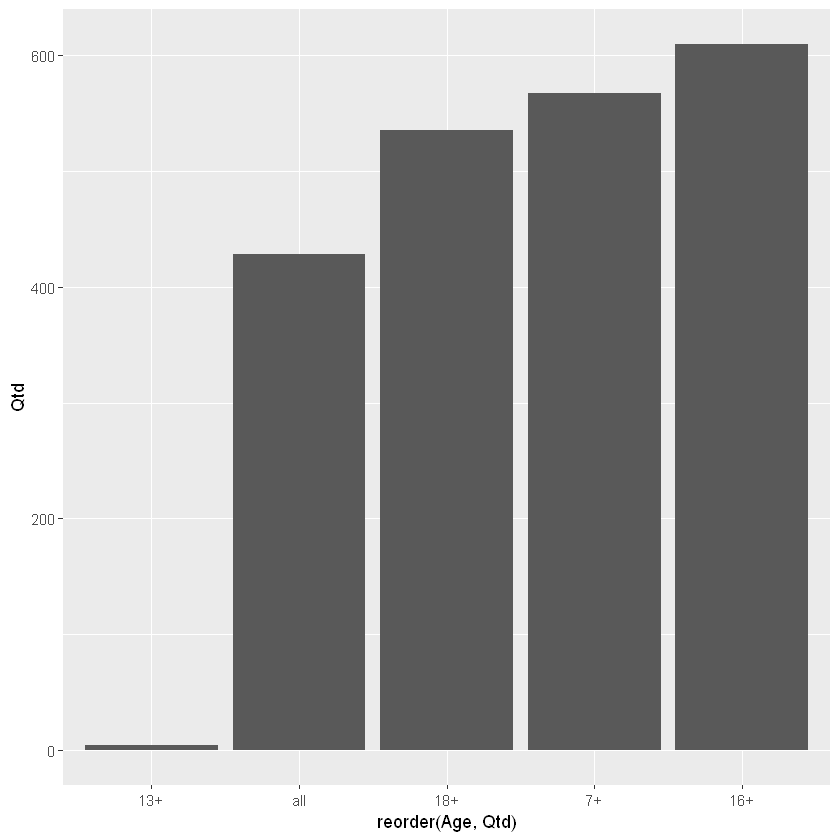

In [42]:
idades <- idades %>% filter(!is.na(Age))
idades %>% ggplot(aes(reorder(Age,Qtd),Qtd)) + geom_bar(stat = "identity")

In [43]:
tmp <- cshows %>% mutate(Periodo=cut(cshows$Year,seq(1900,2020,by=10))) %>% filter(!is.na(IMDb), !is.na(Rotten_Tomatoes))

tmp %>% group_by(Periodo) %>%
    summarise(IMDb_Medio = mean(IMDb, na.rm=T),Rotten_Tomatoes_Medio = mean(Rotten_Tomatoes, na.rm=T))

Periodo,IMDb_Medio,Rotten_Tomatoes_Medio
"(1.95e+03,1.96e+03]",9.000000,82.00000
"(1.96e+03,1.97e+03]",8.333333,93.33333
"(1.98e+03,1.99e+03]",8.285714,86.42857
"(1.99e+03,2e+03]",7.906897,81.51724
"(2e+03,2.01e+03]",7.833645,77.74766
"(2.01e+03,2.02e+03]",7.471505,77.37993


In [44]:
periodo <- cut(cshows$Year,seq(1900,2020,by=10))
t <- table(periodo,cshows$Age)
rownames(t) = c("1900-1910","1910-1920","1920-1930","1930-1940","1940-1950","1950-1960","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020")
print(t)

           
periodo     13+ 16+ 18+  7+ all
  1900-1910   0   0   0   0   0
  1910-1920   0   0   0   0   0
  1920-1930   0   0   0   0   0
  1930-1940   0   0   0   0   1
  1940-1950   0   0   0   1   0
  1950-1960   0   1   0   3   6
  1960-1970   0   1   0  10  12
  1970-1980   0   1   1   5   8
  1980-1990   0   3   5  34  23
  1990-2000   2  26  16  54  47
  2000-2010   2 133  77 122 100
  2010-2020   0 445 437 339 231


Warning message:
"Removed 938 rows containing non-finite values (stat_density)."Warning message:
"Removed 3435 rows containing non-finite values (stat_density)."

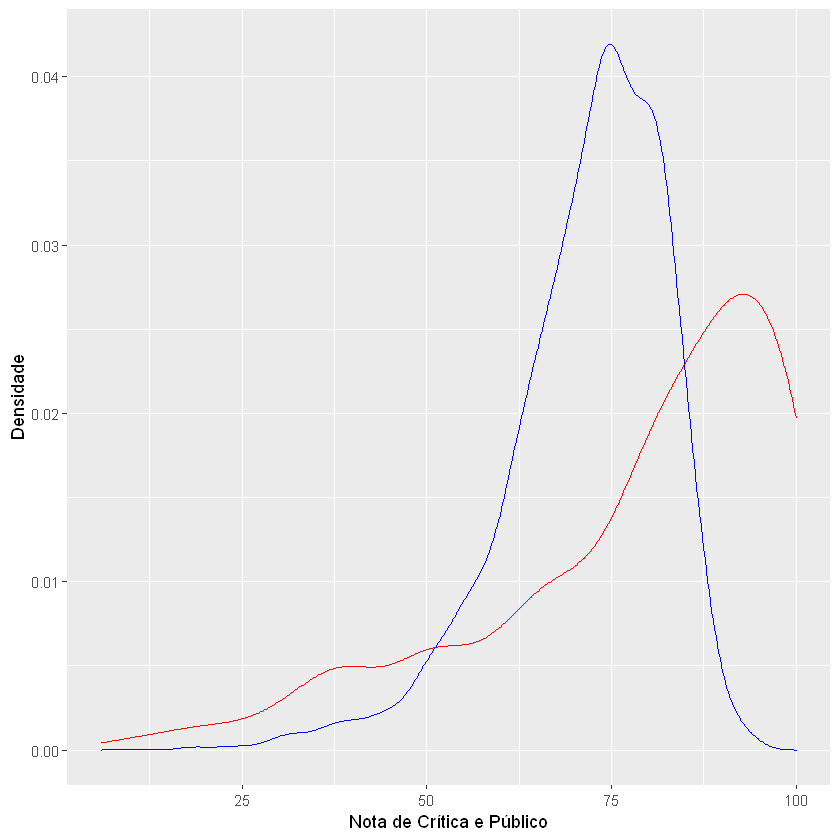

In [45]:
cshows %>% ggplot(na.rm=T) + geom_density(aes(IMDb*10),colour='Blue') +
    geom_density(aes(Rotten_Tomatoes),colour="Red") +
    xlab("Nota de Crítica e Público") +
    ylab("Densidade")

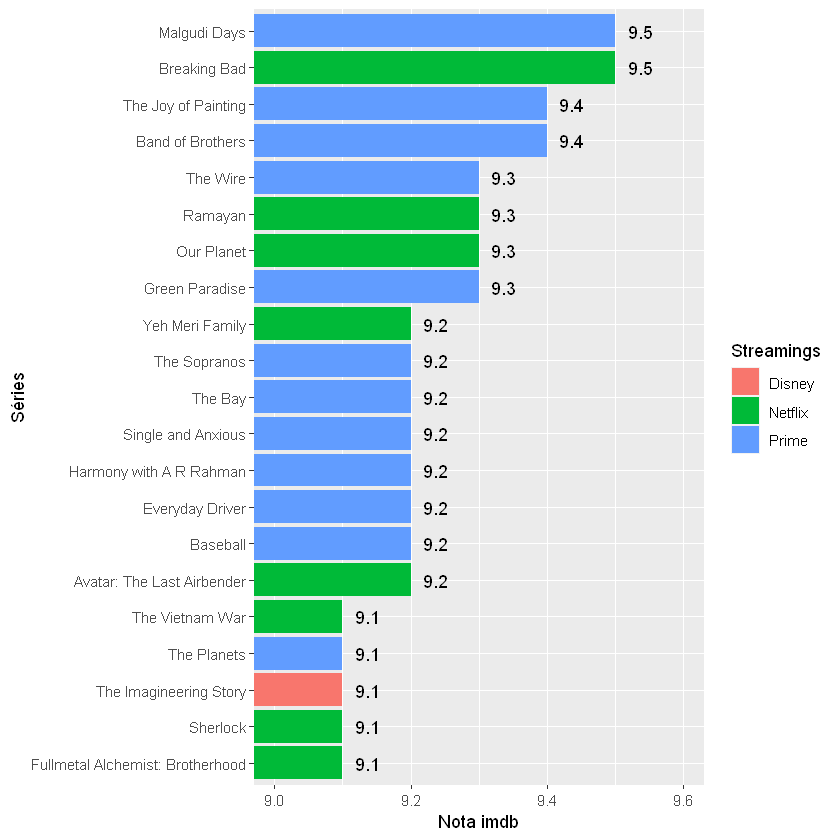

In [46]:
# Melhores séries pelo IMDb, notas > 9
(cshows %>% arrange(-IMDb) %>% filter(IMDb>9)) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(9,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

In [47]:
# Séries 100% no Rotten Tomatoes
cshows %>% filter(Rotten_Tomatoes==100) %>% select(Title) %>% arrange(Title) %>% as.list() %>% print()

$Title
 [1] "1983"                                        
 [2] "3Below: Tales of Arcadia"                    
 [3] "Abstract: The Art of Design"                 
 [4] "Avatar: The Last Airbender"                  
 [5] "Better Than Us"                              
 [6] "Big Mouth"                                   
 [7] "Black Books"                                 
 [8] "Carole & Tuesday"                            
 [9] "Chef's Table"                                
[10] "Chewing Gum"                                 
[11] "Counterpart"                                 
[12] "Crazyhead"                                   
[13] "Diagnosis"                                   
[14] "Diary of a Future President"                 
[15] "Dirty Money"                                 
[16] "DuckTales"                                   
[17] "DuckTales"                                   
[18] "Elfen Lied"                                  
[19] "Fauda"                                       
[20] 

In [48]:
# Séries 100% no Rotten Tomatoes de Sci-fi
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Sci-")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
3Below: Tales of Arcadia,2018,7+,7.8,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Gravity Falls,2012,7+,8.9,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Mystery Science Theater 3000: The Return,2017,16+,8.0,100,Netflix,"TV Comedies, TV Sci-Fi & Fantasy"
Star Wars Rebels,2014,7+,8.0,100,Disney,"Animation, Action, Adventure, Family, Fantasy, Mystery, Sci-Fi"
The Dragon Prince,2018,7+,8.4,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
The New Legends of Monkey,2018,7+,6.5,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"


In [49]:
# Séries 100% no Rotten Tomatoes de Aventura
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Adventure")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
3Below: Tales of Arcadia,2018,7+,7.8,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
Avatar: The Last Airbender,2005,7+,9.2,100,Netflix,"Classic & Cult TV, Kids' TV, TV Action & Adventure"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Adventure, Comedy, Family"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Fauda,2015,16+,8.3,100,Netflix,"Crime TV Shows, International TV Shows, TV Action & Adventure"
Gravity Falls,2012,7+,8.9,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Green Eggs and Ham,2019,NA,8.2,100,Netflix,"Kids' TV, TV Action & Adventure, TV Comedies"
Lizzie McGuire,2001,all,6.6,100,Disney,"Adventure, Comedy, Family, Music, Romance"
Queen Sono,2020,18+,5.8,100,Netflix,"International TV Shows, TV Action & Adventure, TV Dramas"
Star Wars Rebels,2014,7+,8.0,100,Disney,"Animation, Action, Adventure, Family, Fantasy, Mystery, Sci-Fi"


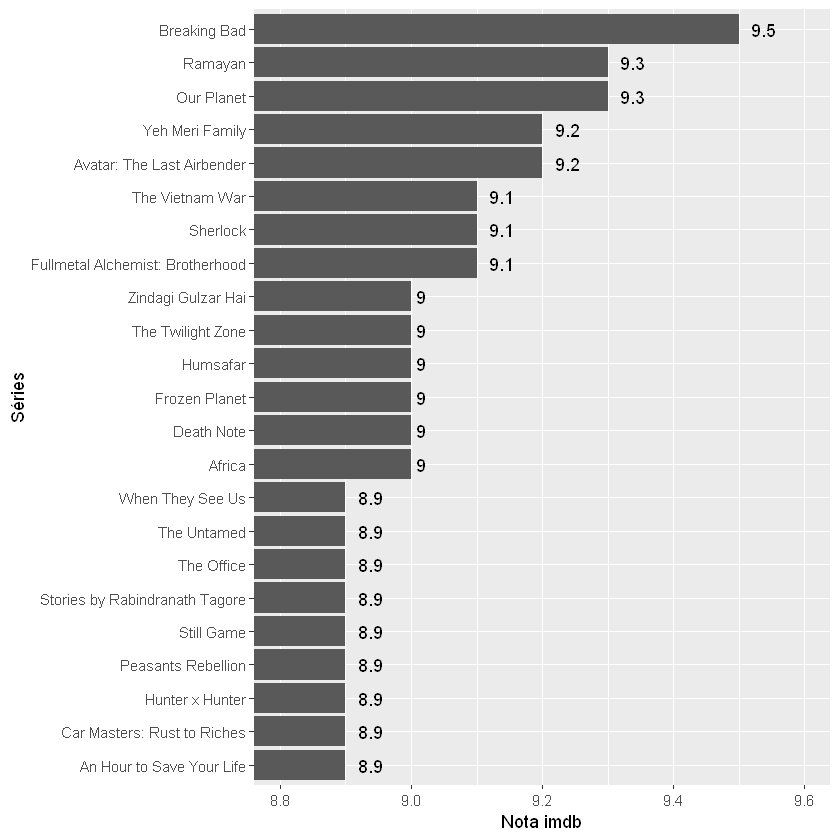

In [50]:
# Melhores séries disponíveis na Netflix pelo IMDb, notas > 8.8
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.8, str_detect(Streamings, "Netflix"))) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.8,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

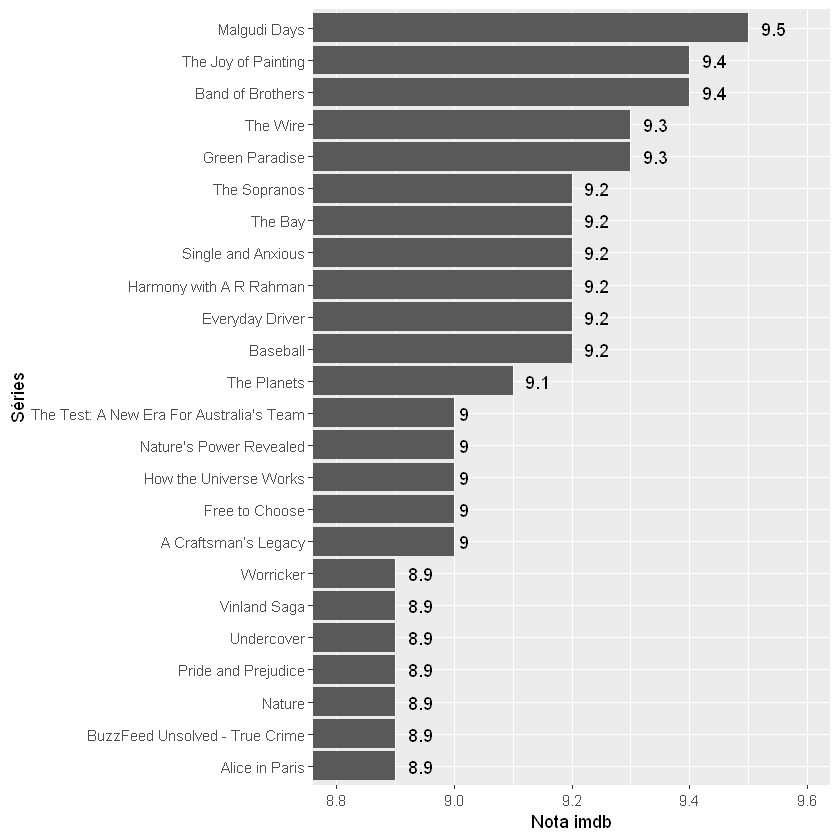

In [51]:
# Melhores séries disponíveis na Prime Vídeo pelo IMDb, notas > 8.8
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.8, str_detect(Streamings, "Prime"))) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.8,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

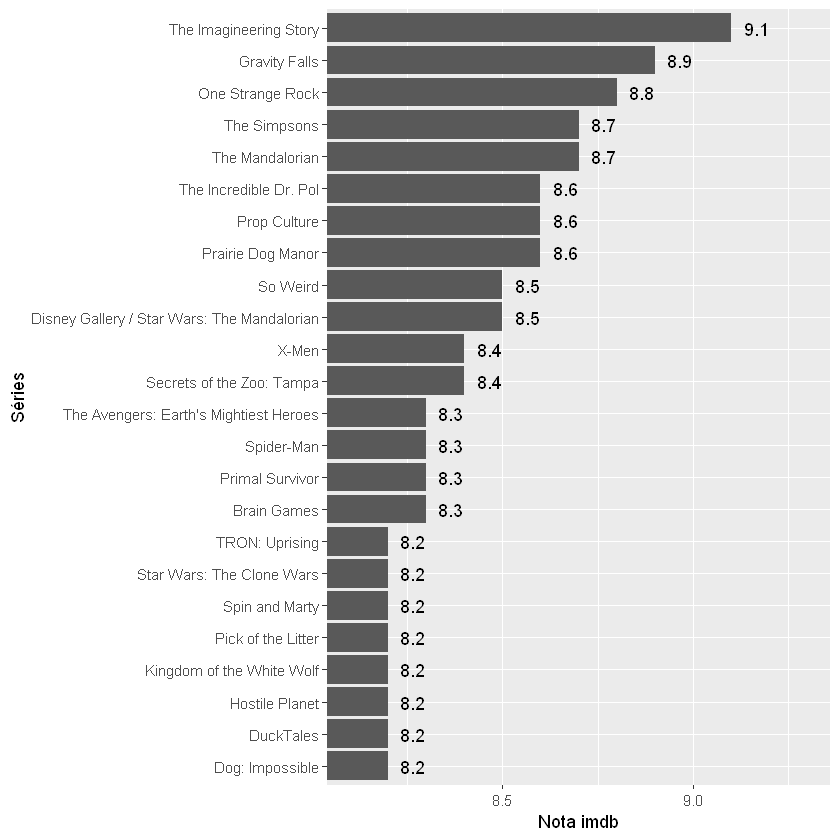

In [52]:
# Melhores séries disponíveis no Disney+ pelo IMDb, notas > 8.8                           
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.1, str_detect(Streamings, "Disney")))[c(T,T,T,F,T,T,T,T,T,T,T,T,T,F,T,F,T,T,T,F,T,F,T,T,T,F,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.1,9.3)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

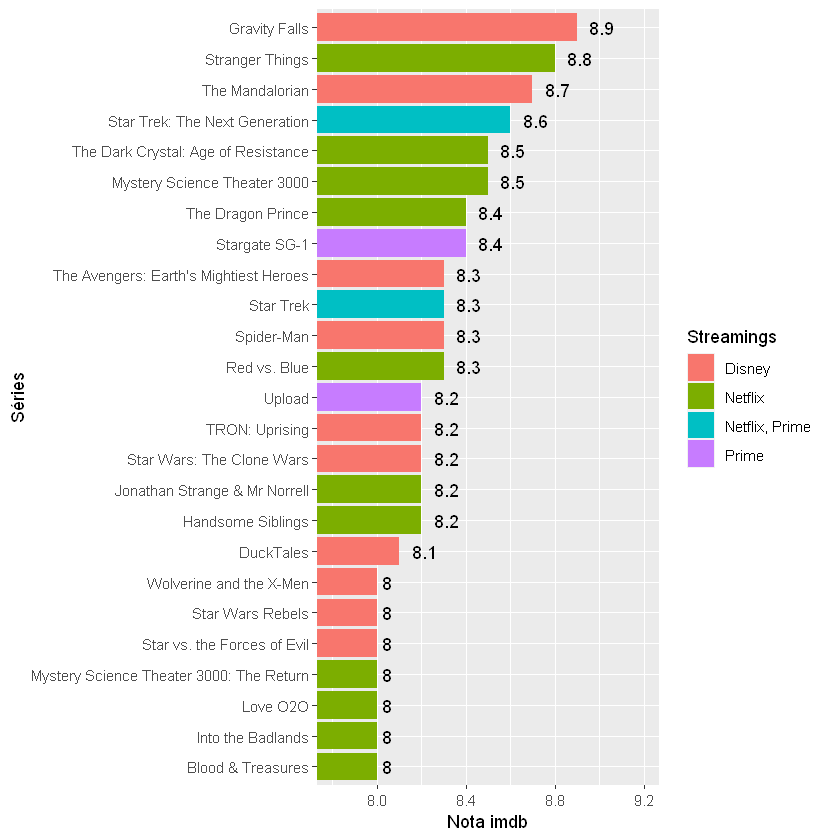

In [53]:
# Melhores séries de Ficção pelo IMDb (nota > 7.9)
(cshows %>% filter(str_detect(Genre,"Sci-"), IMDb>7.9) %>% arrange(-IMDb))[c(T,T,T,T,T,T,T,T,T,T,T,F,T,T,T,T,F,T,F,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(7.8,9.2)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

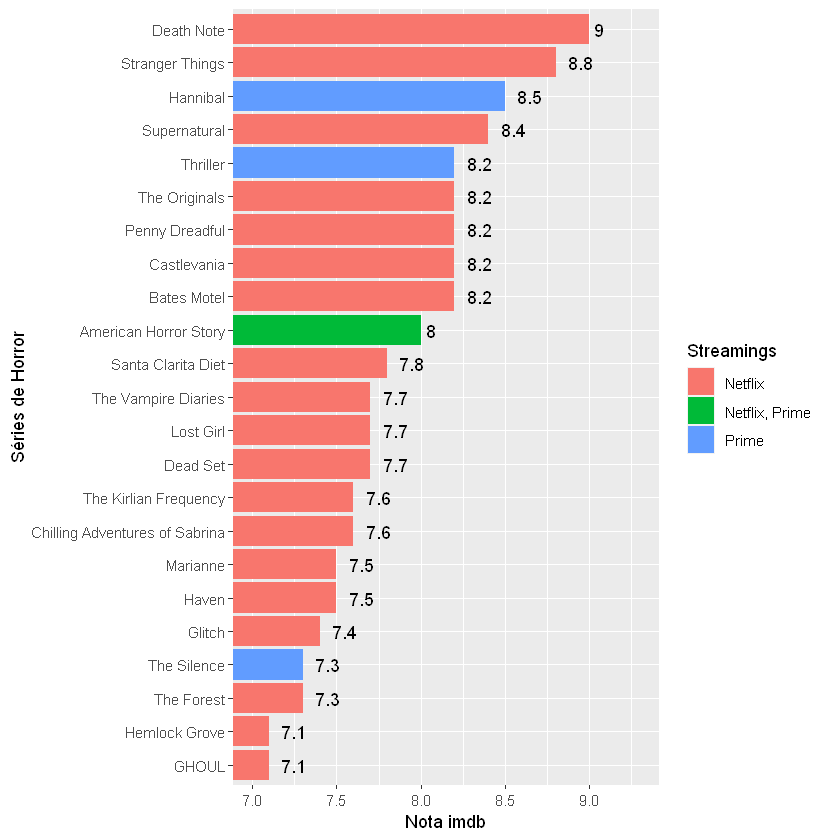

In [54]:
# Melhores séries de Horror por IMDb
(cshows %>% filter(str_detect(Genre,'Horror'), IMDb>7) %>% arrange(-IMDb))[c(T,T,T,T,F,T,F,T,F,T,T,F,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(7,9.3)) + xlab("Séries de Horror") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

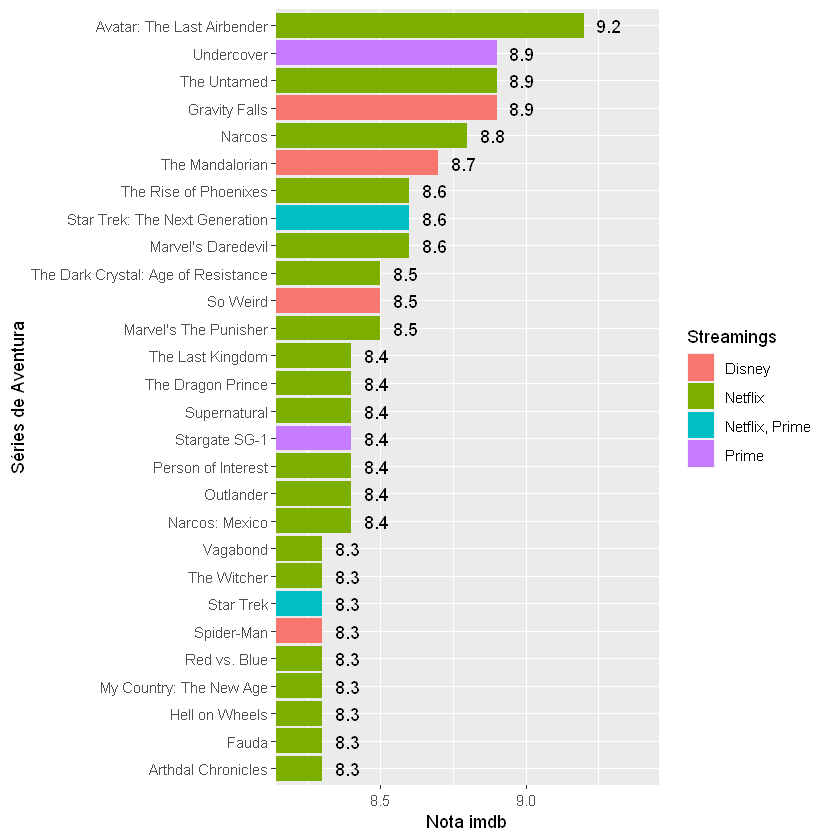

In [55]:
# Melhores séries de Adventure por IMDb
(cshows %>% filter(str_detect(Genre,'Adventure'), IMDb>8.2) %>% arrange(-IMDb)) %>% head(28) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(8.2,9.4)) + xlab("Séries de Aventura") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

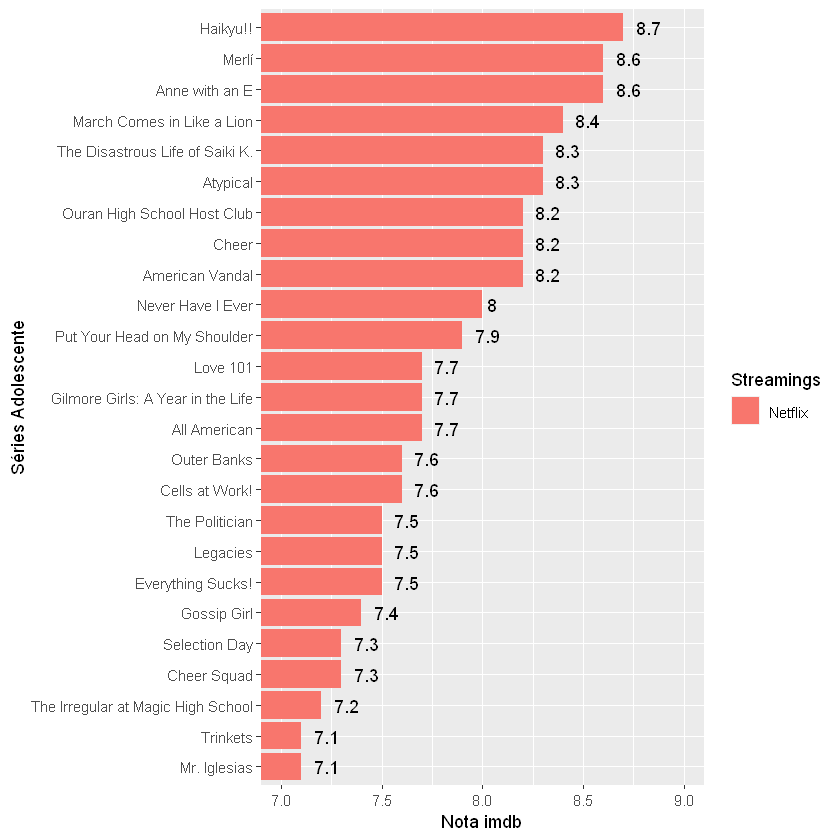

In [56]:
# Melhores séries Teen por IMDb
cshows %>% filter(str_detect(Genre,'Teen'), IMDb > 7) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(7,9)) + xlab("Séries Adolescente") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

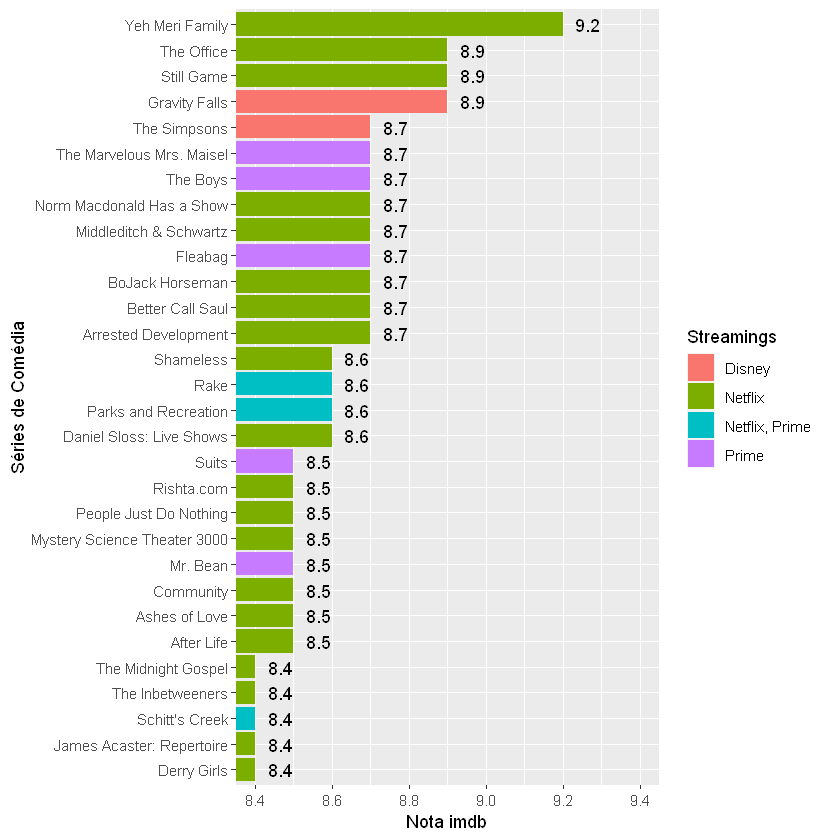

In [57]:
# Melhores séries Comedy por IMDb
(cshows %>% filter(str_detect(Genre,'Comed'), IMDb>8.3))[c(T,T,T,T,F,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(8.4,9.4)) + xlab("Séries de Comédia") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

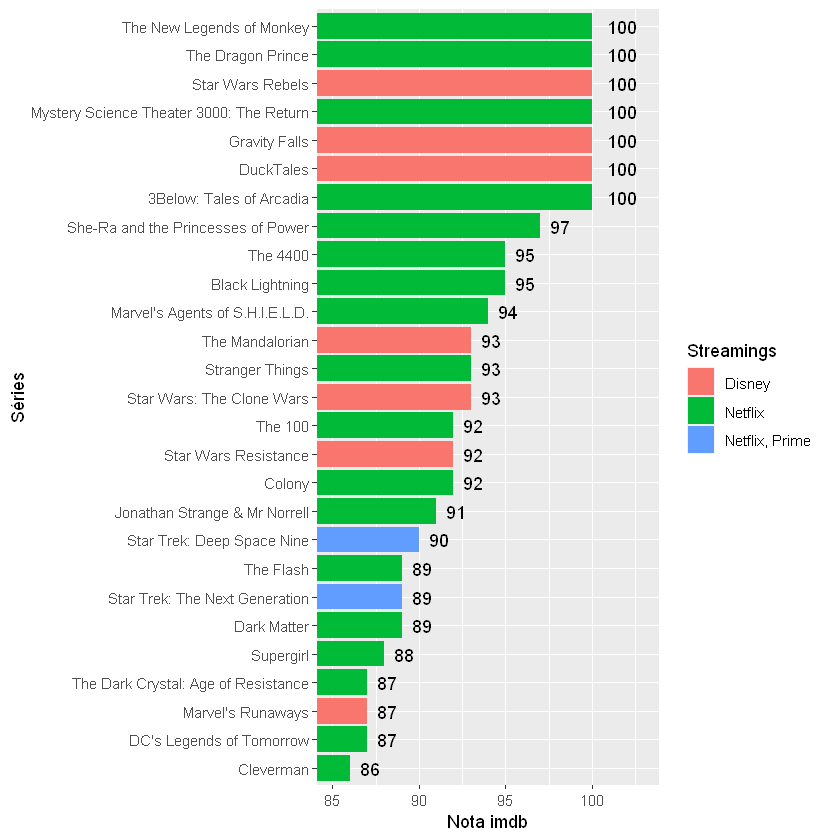

In [58]:
# Melhores séries de Ficção pelo Rotten 
(cshows %>% filter(str_detect(Genre,"Sci-"), Rotten_Tomatoes > 85) %>% arrange(-IMDb))[c(T,T,T,T,T,T,T,F,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(85,103)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

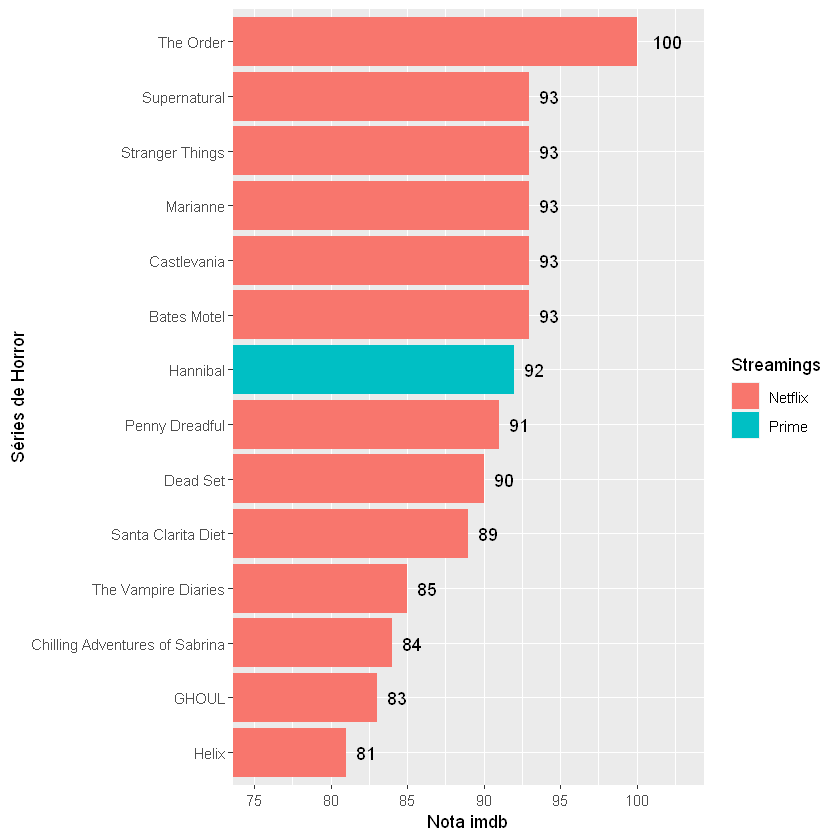

In [59]:
# Melhores séries de Horror pelo Rotten
(cshows %>% filter(str_detect(Genre,'Horror'), Rotten_Tomatoes>80) %>% arrange(-IMDb))[c(T,T,T,F,T,F,T,F,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(75,103)) + xlab("Séries de Horror") + ylab("Nota imdb") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

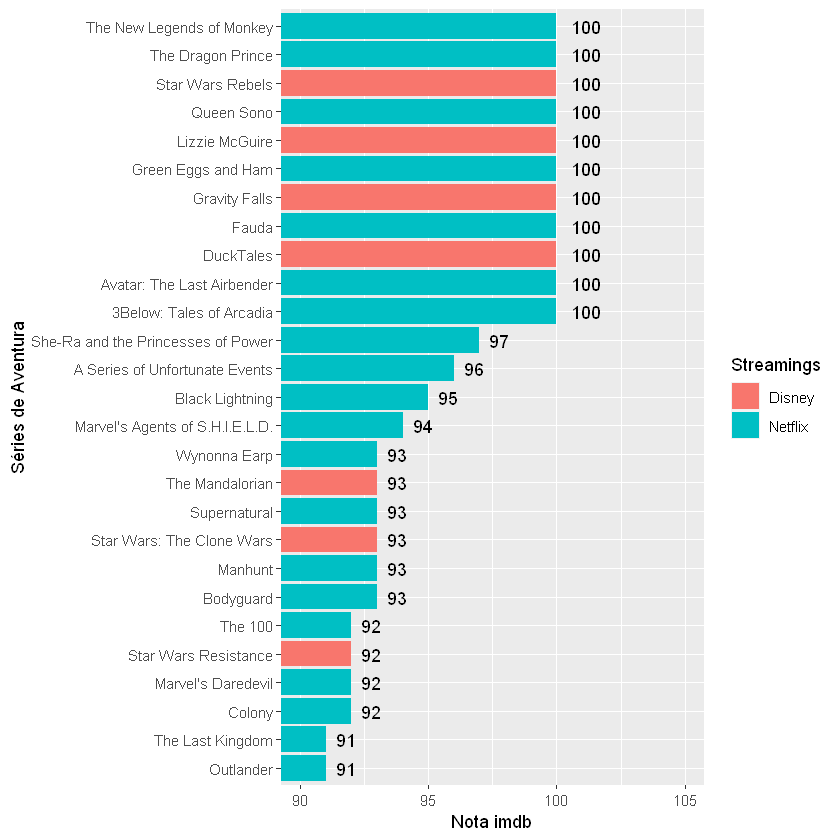

In [60]:
# Melhores séries de Adventure pelo Rotten
(cshows %>% filter(str_detect(Genre,'Adventure'), Rotten_Tomatoes>90) %>% arrange(-IMDb))[c(T,T,T,T,T,T,T,T,T,T,F,T,F,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(90,105)) + xlab("Séries de Aventura") + ylab("Nota imdb") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

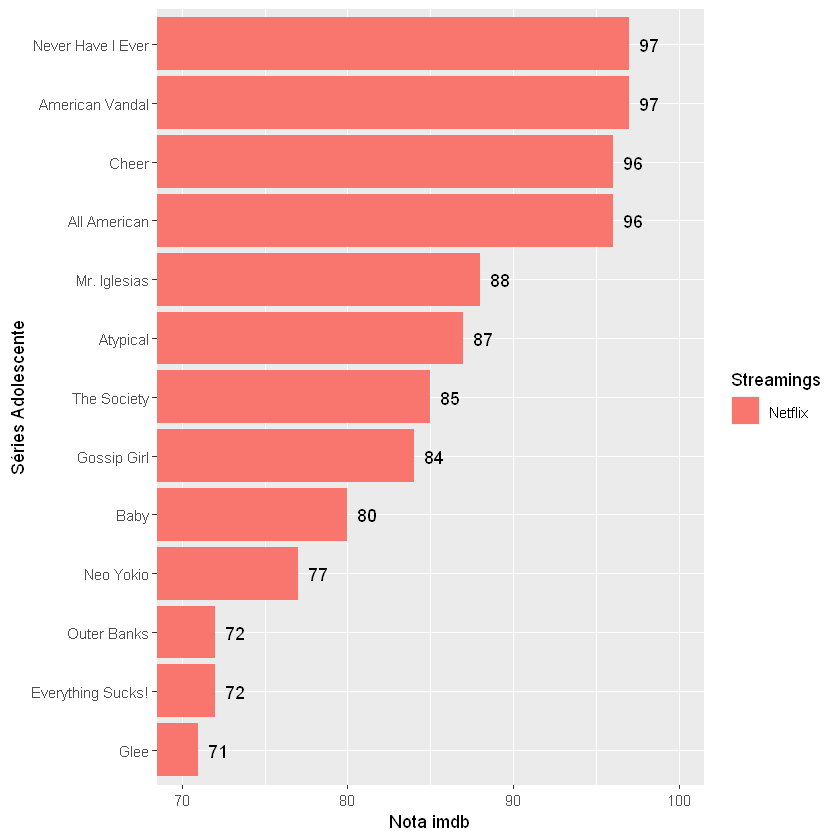

In [61]:
# Melhores séries Teen pelo Rotten
cshows %>% filter(str_detect(Genre,'Teen'), Rotten_Tomatoes > 70) %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(70,100)) + xlab("Séries Adolescente") + ylab("Nota imdb") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

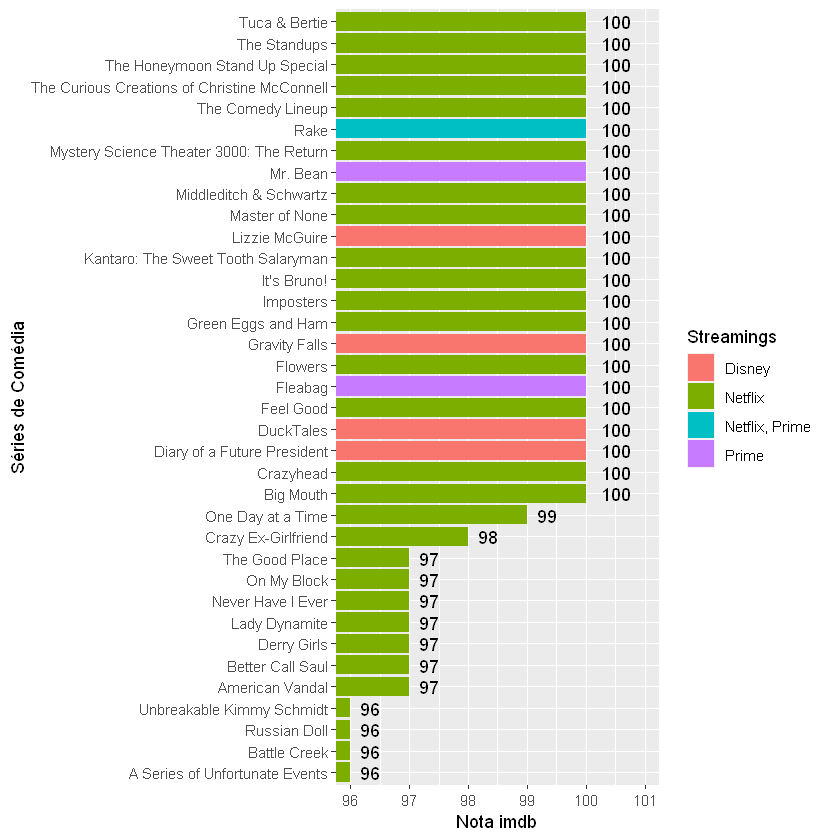

In [62]:
# Melhores séries Comedy por IMDb
(cshows %>% filter(str_detect(Genre,'Comed'), Rotten_Tomatoes>95))[c(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,F,T,T),] %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(96,101)) + xlab("Séries de Comédia") + ylab("Nota imdb") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

## Considerações finais

Para a elaboração do trabalho nossa dupla optou por se reunir em uma chamada via zoom e realizar a montagem do banco a ser utilizado. Após isso foi realizado de forma mais individual, com cada membro criando algumas visualizações e depois juntando ambas.